# Airline Customer Satisfaction

## Importing Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/Airline_passenger_satisfaction/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [160]:
df.shape

(129880, 24)

In [161]:
df.size

3117120

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [163]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [164]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [165]:
df=df.dropna()

In [166]:
df.isna().sum().any()

False

In [167]:
df.nunique()

ID                                        129487
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              464
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

## EDA Analysis

<AxesSubplot:>

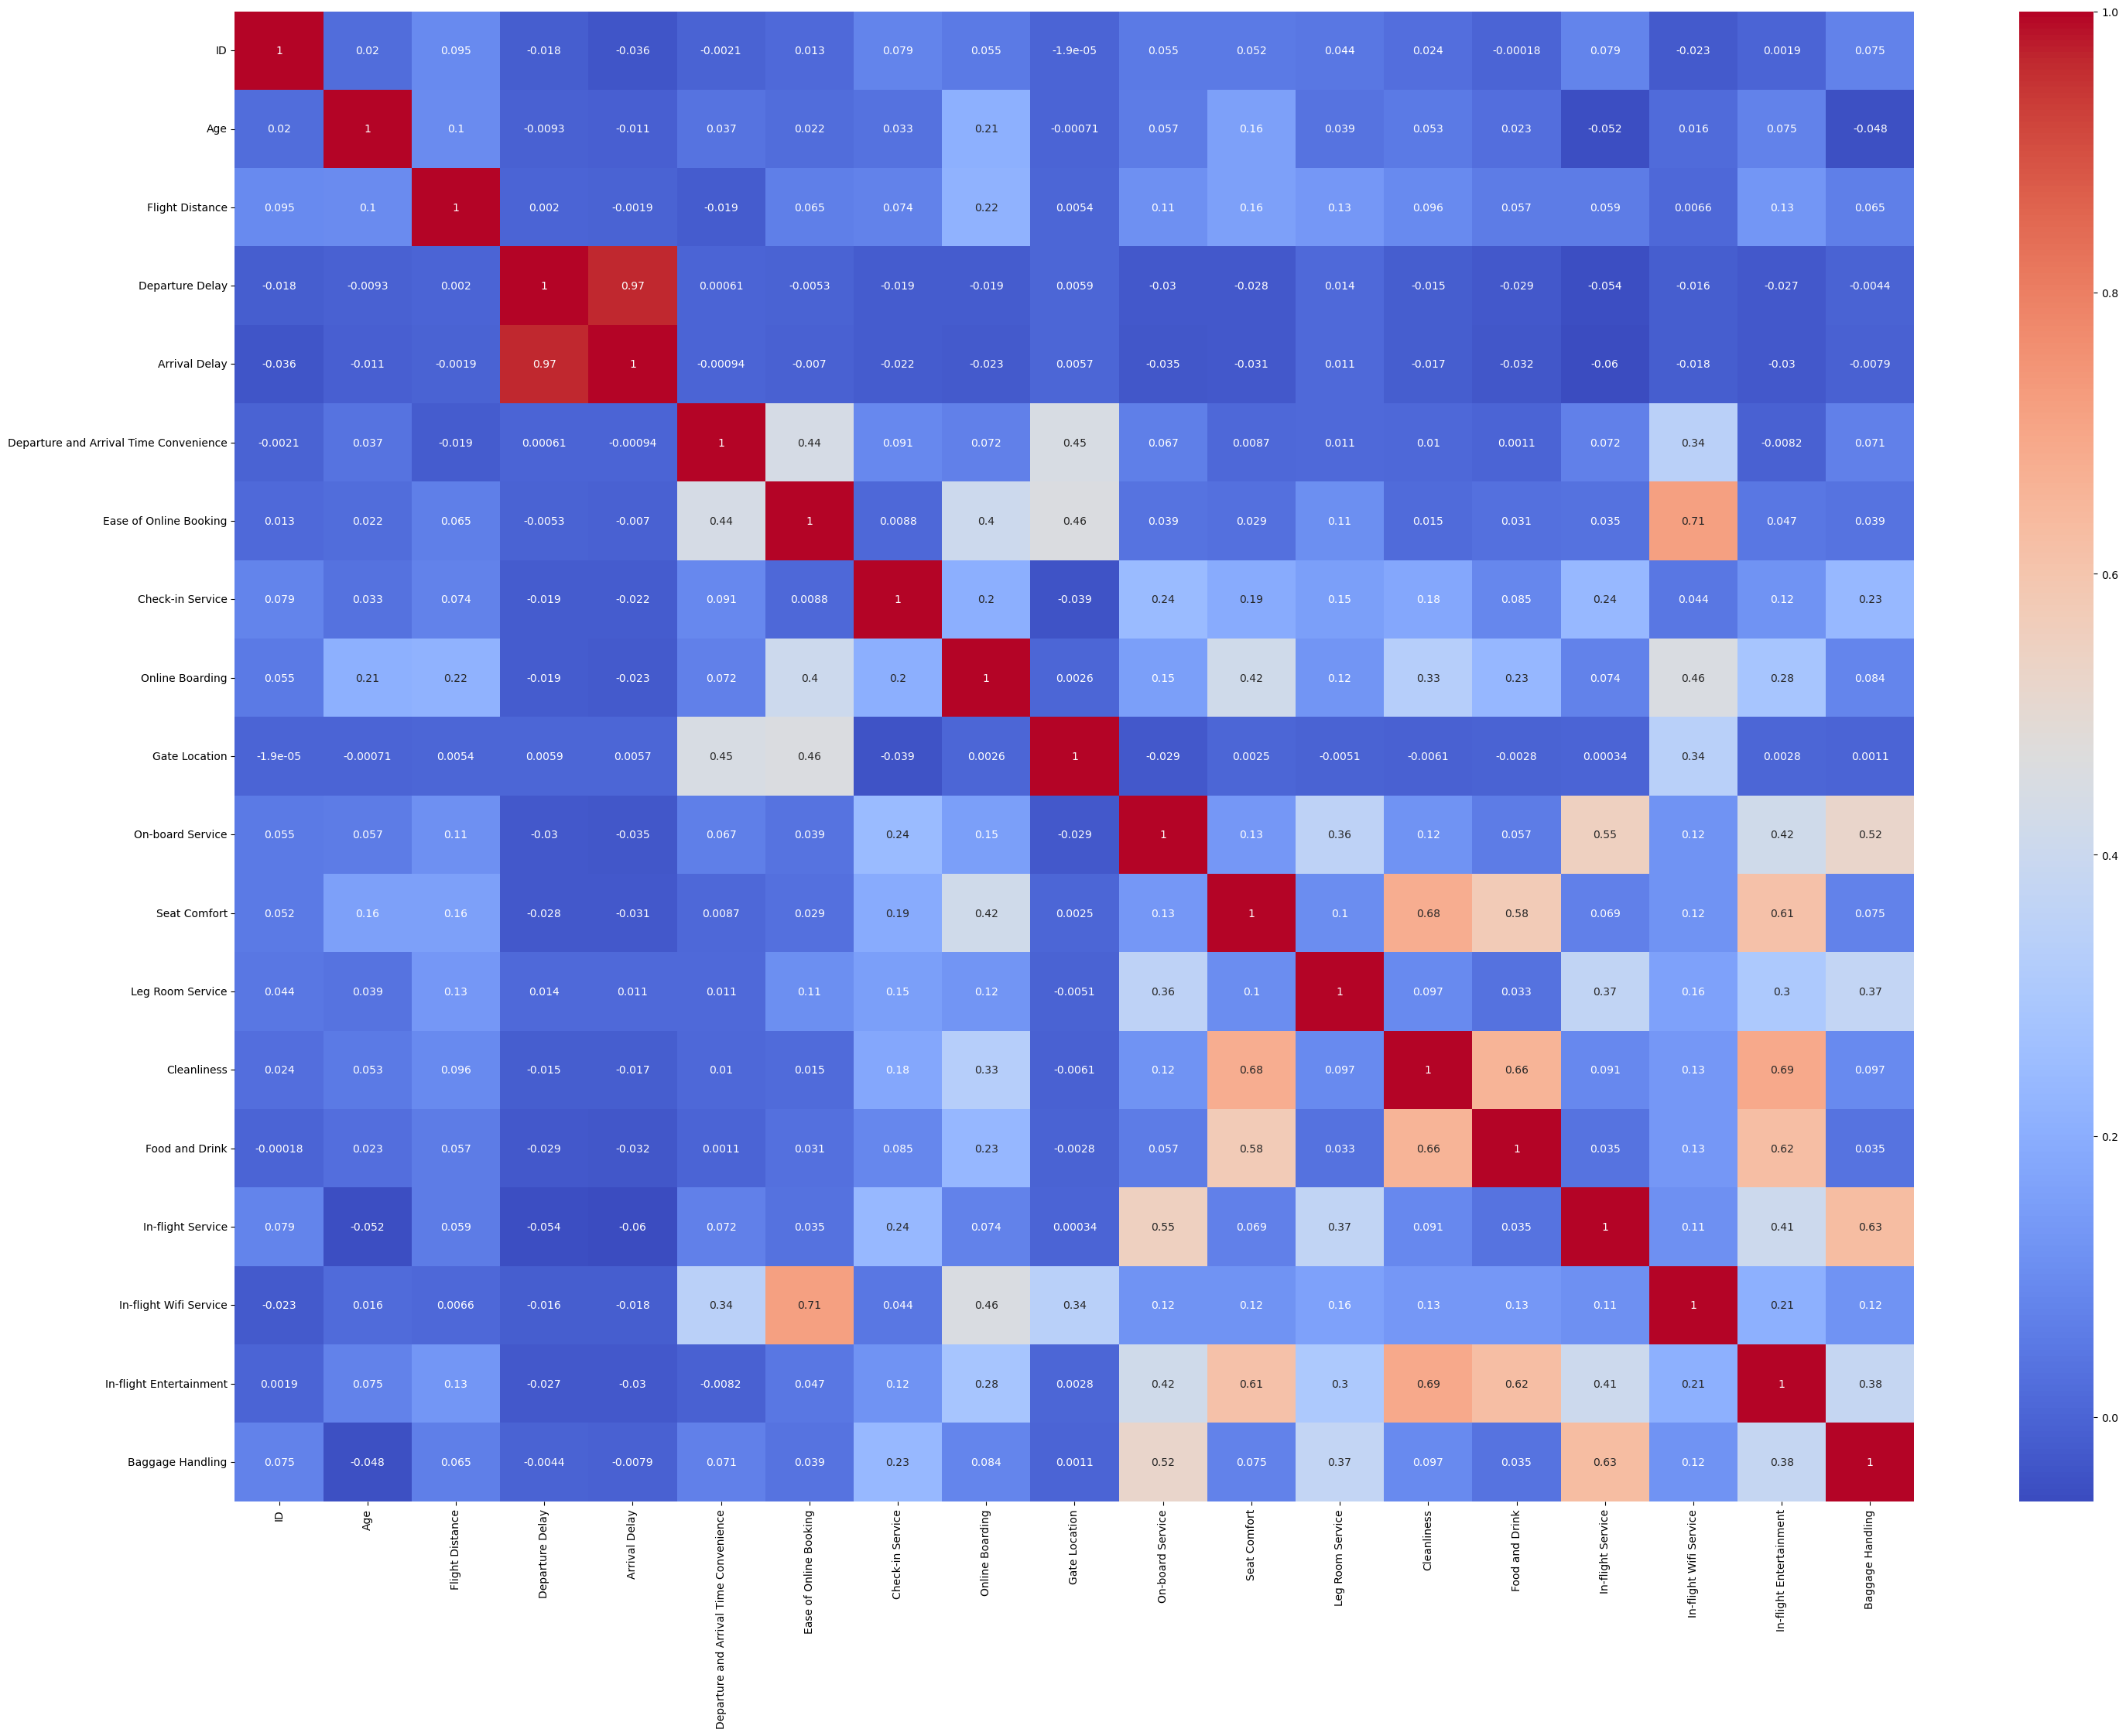

In [168]:
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [169]:
df=df.drop(columns={'ID'})

In [170]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


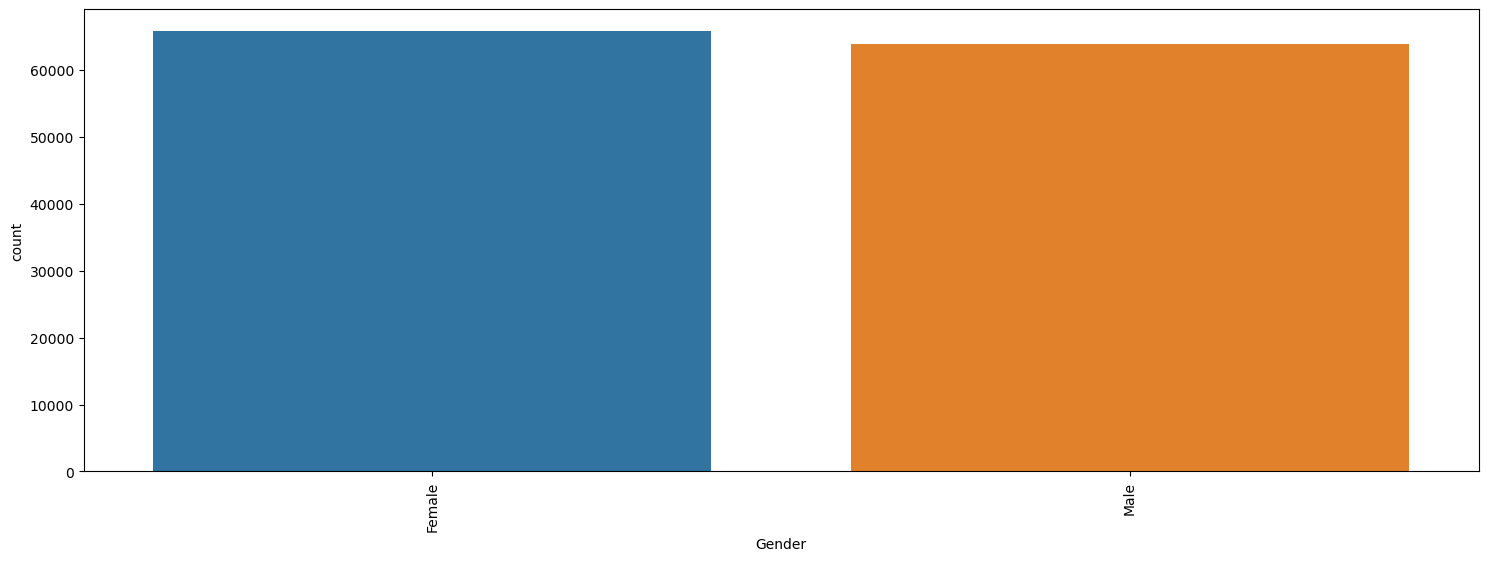

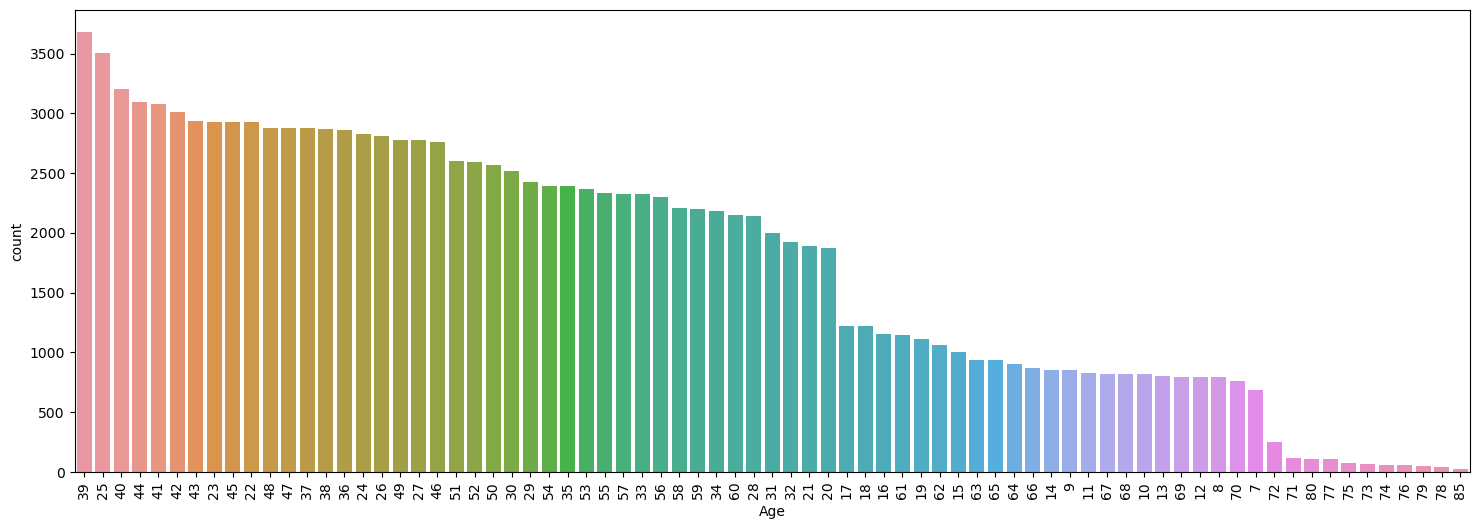

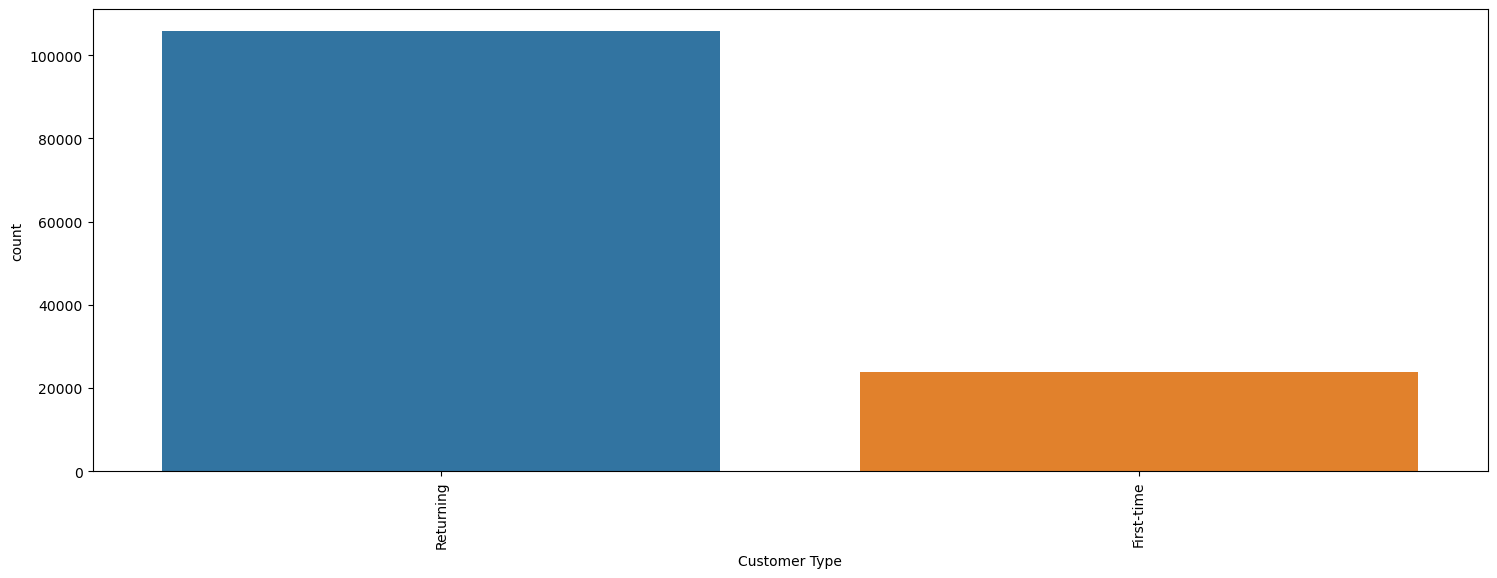

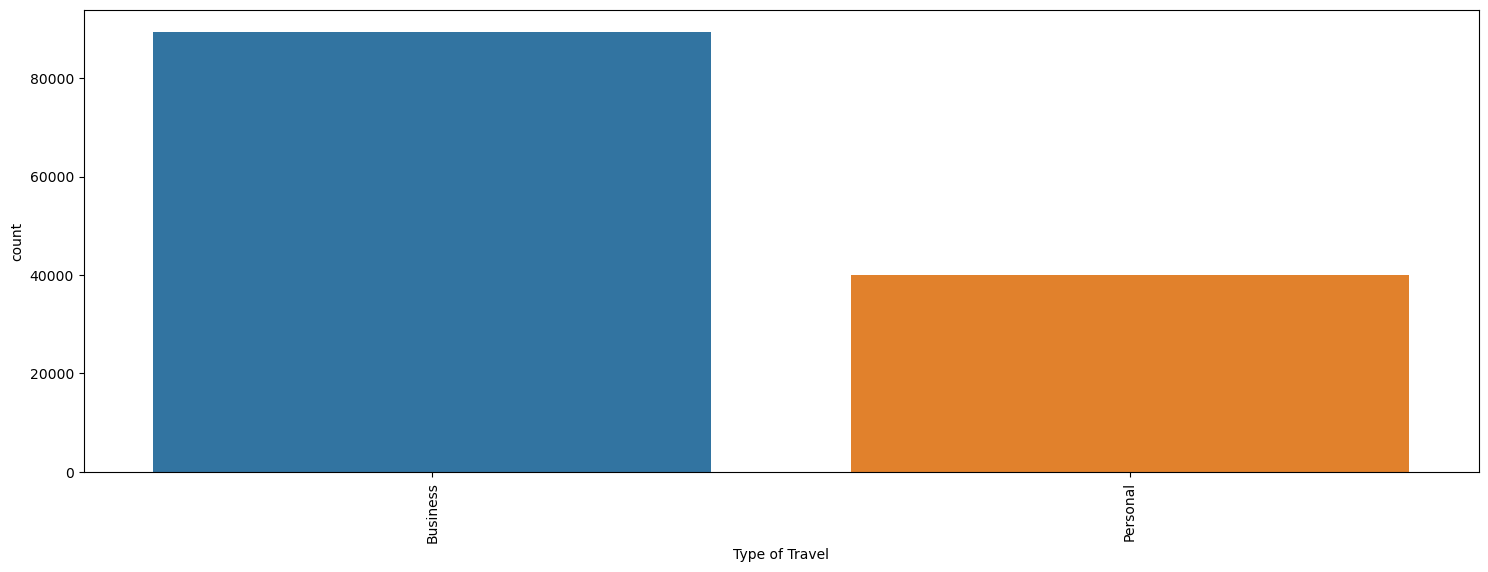

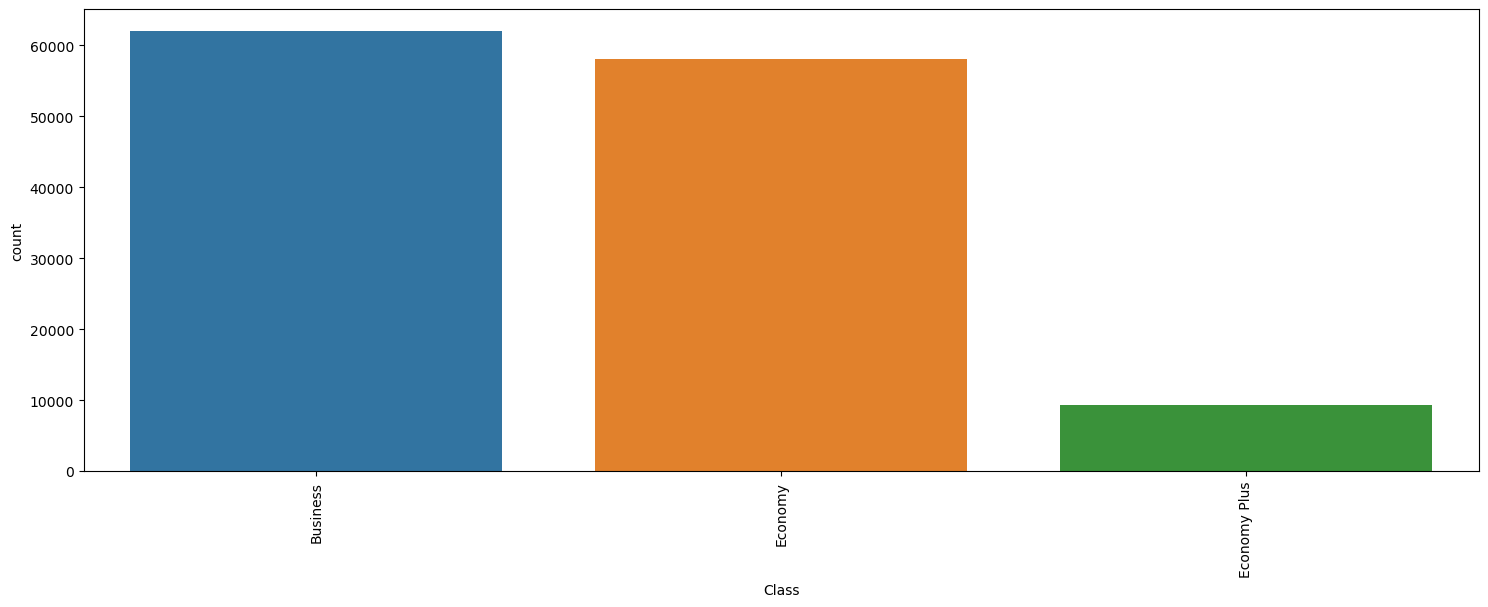

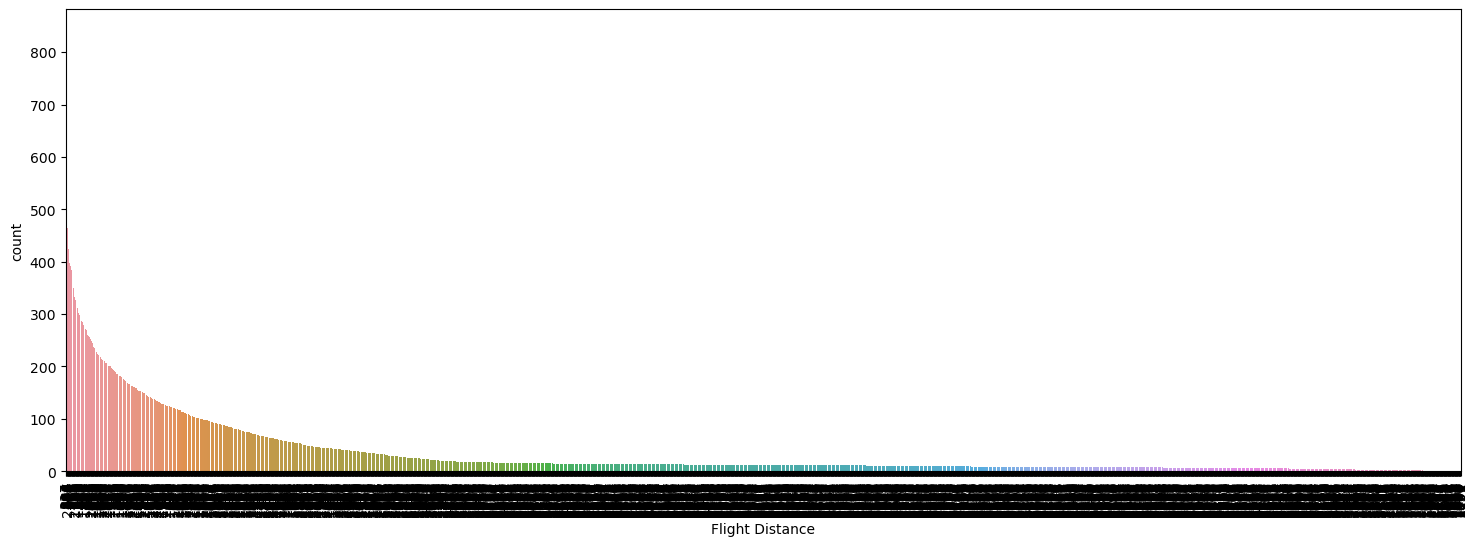

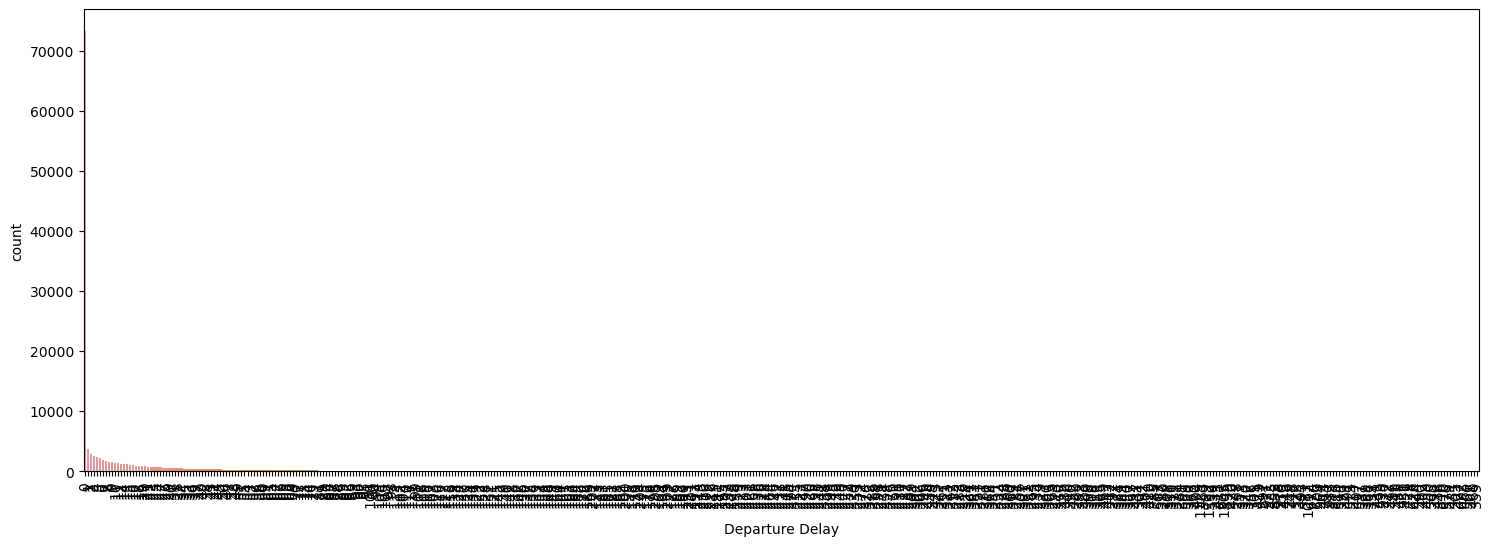

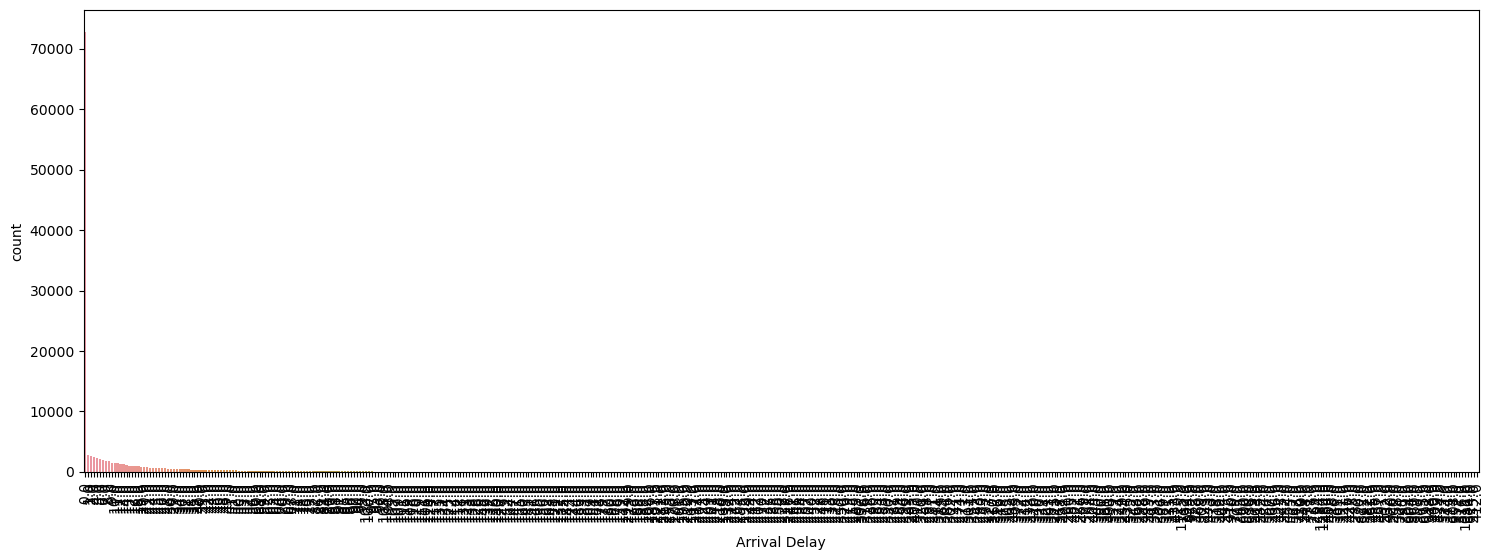

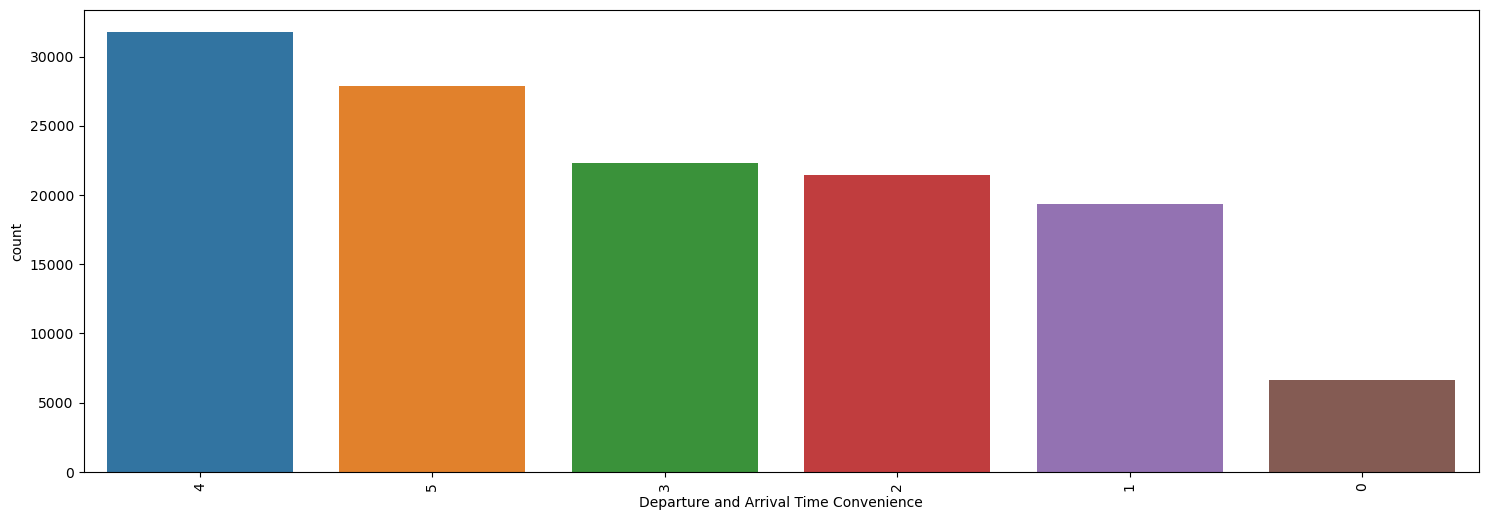

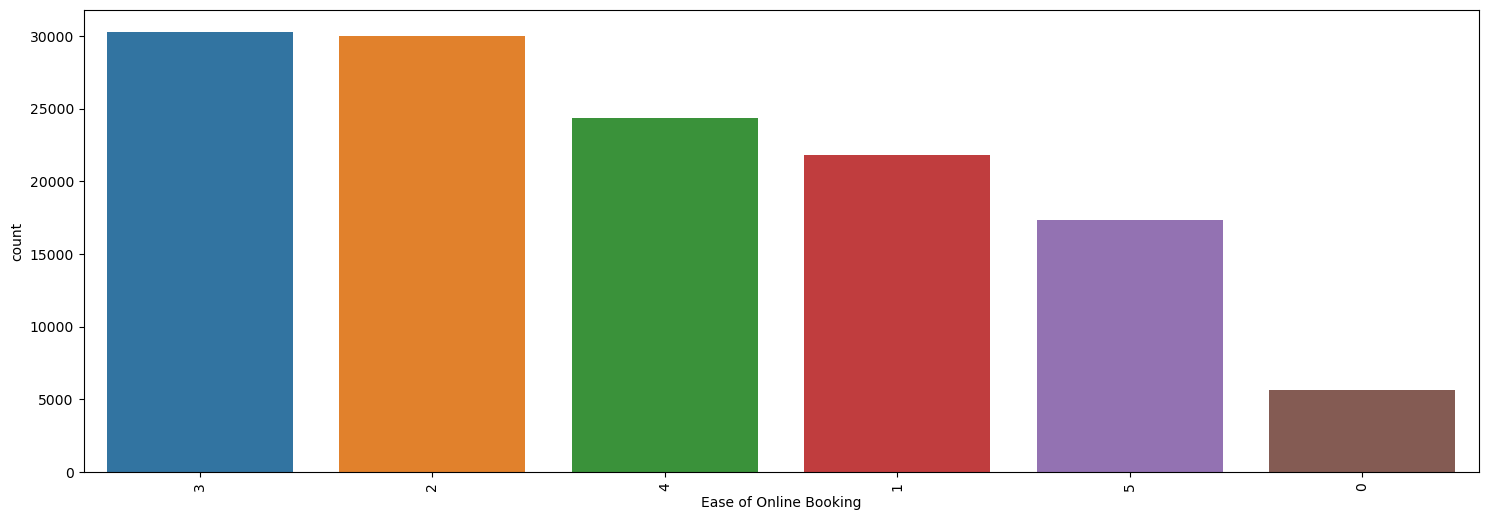

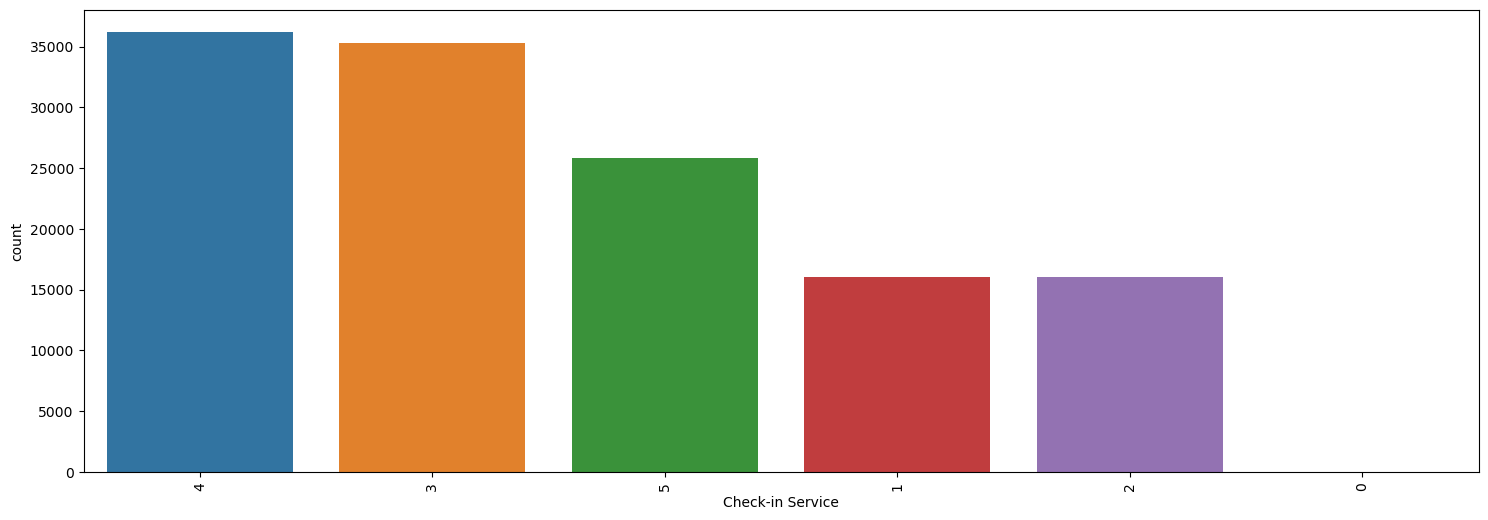

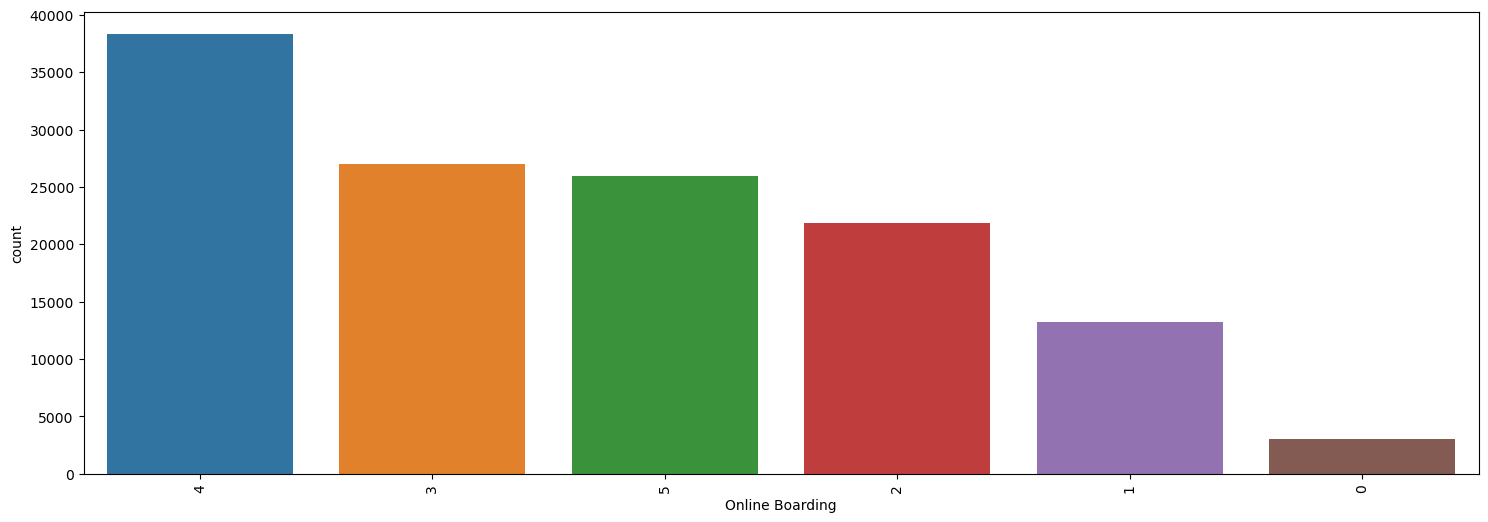

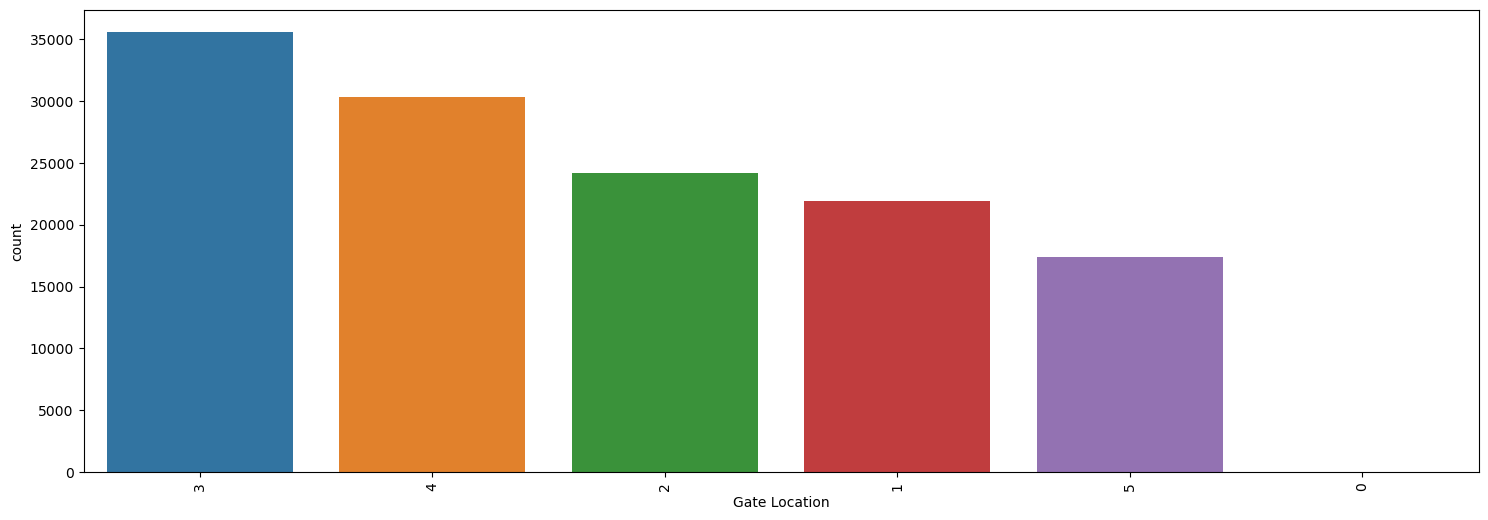

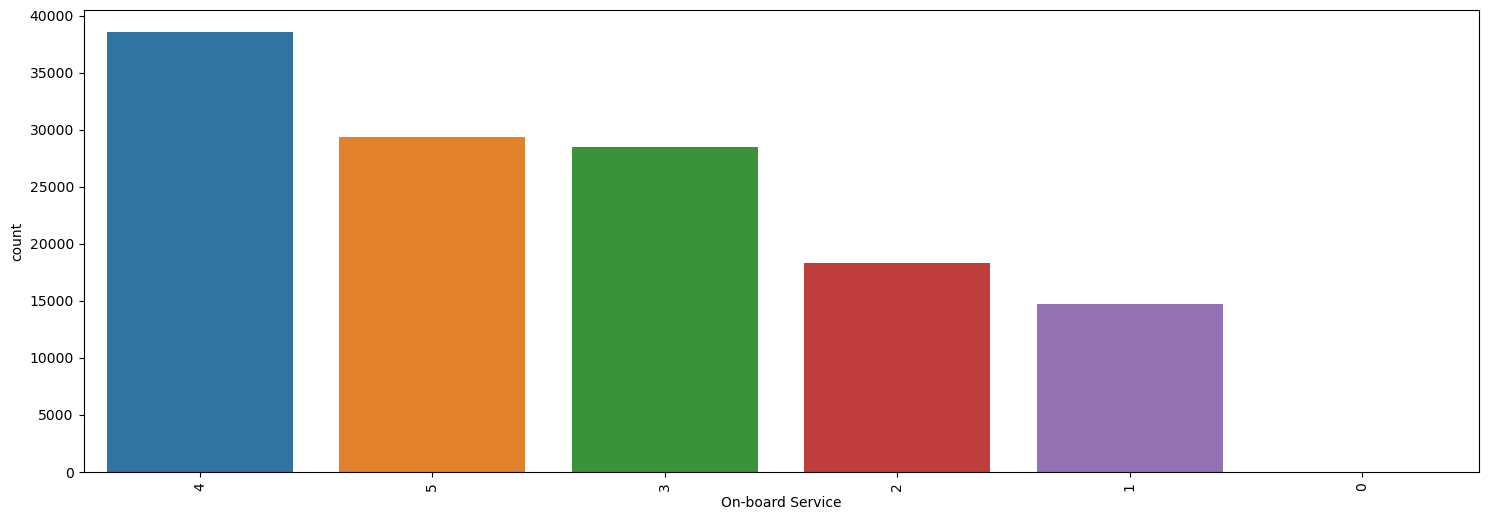

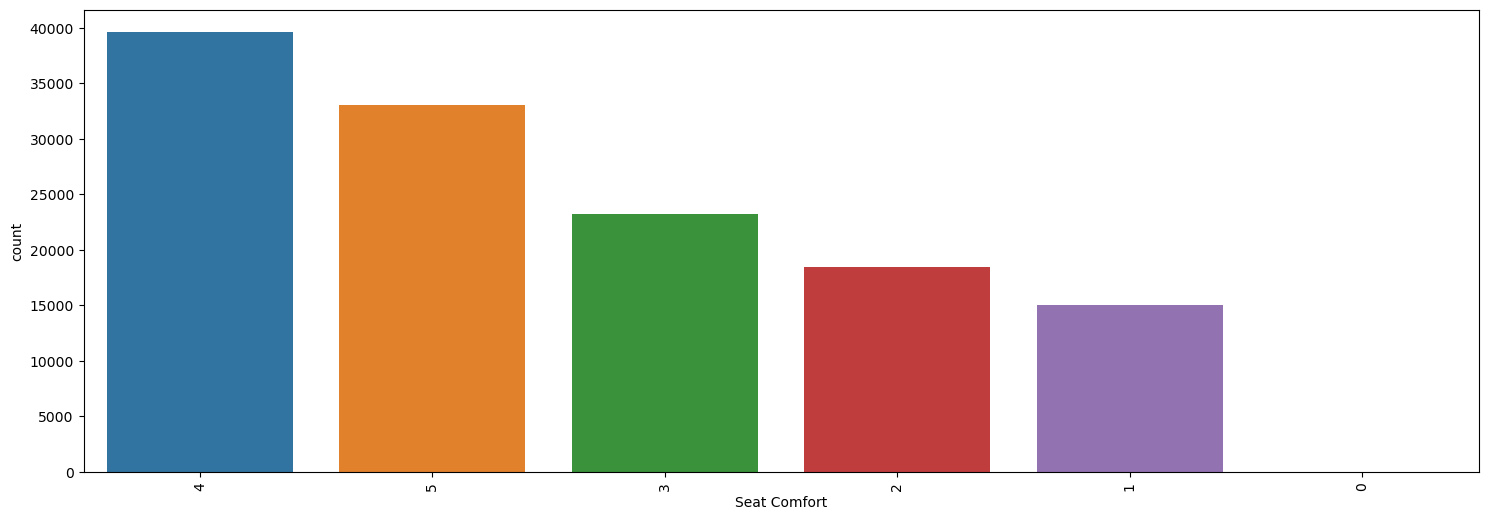

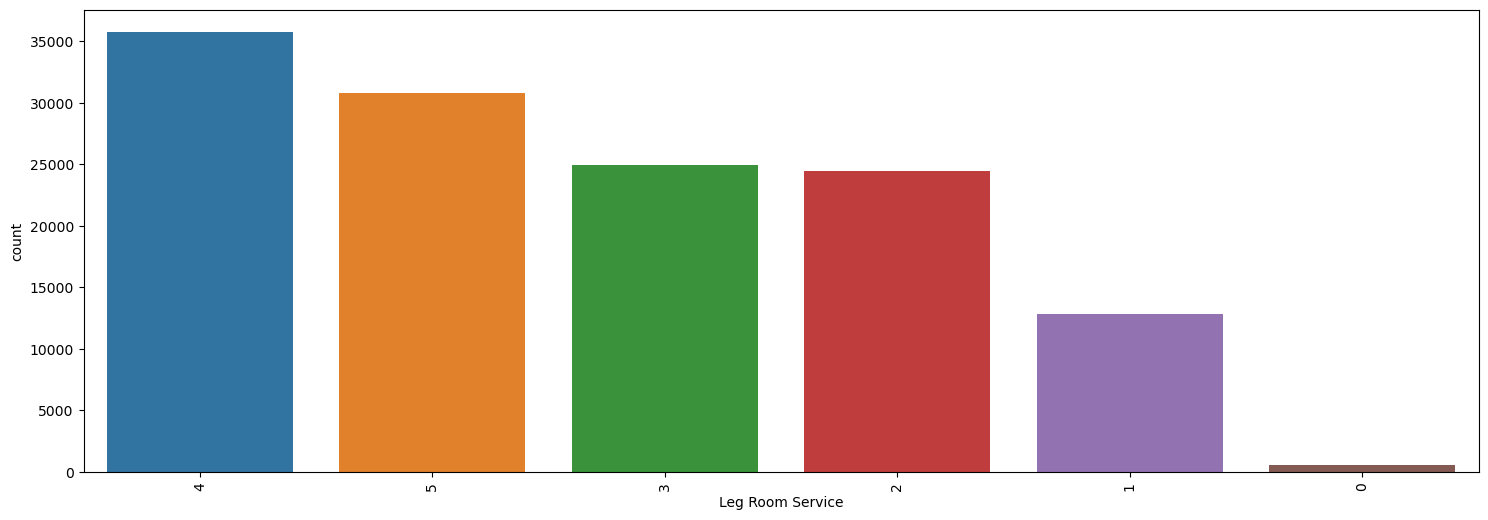

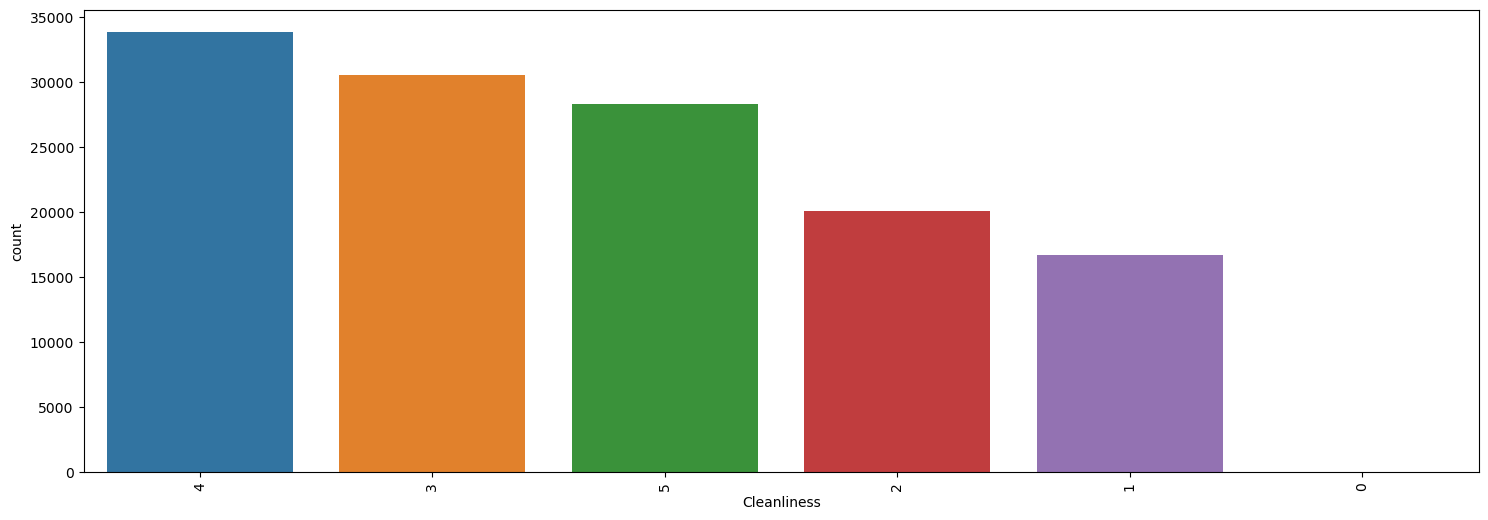

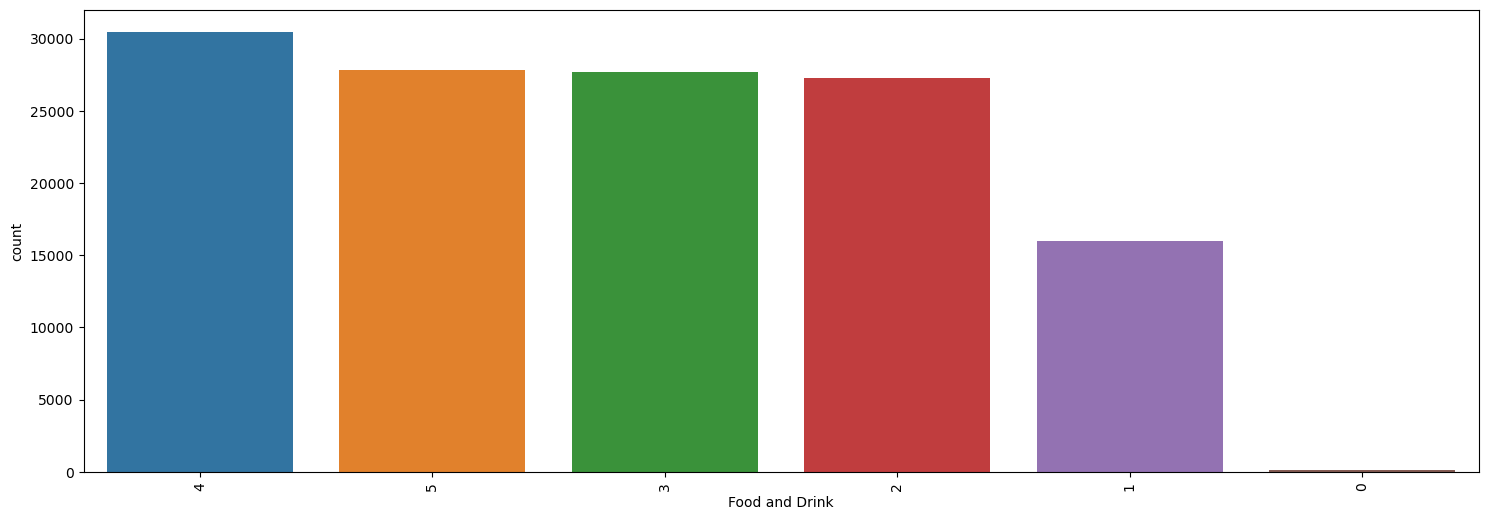

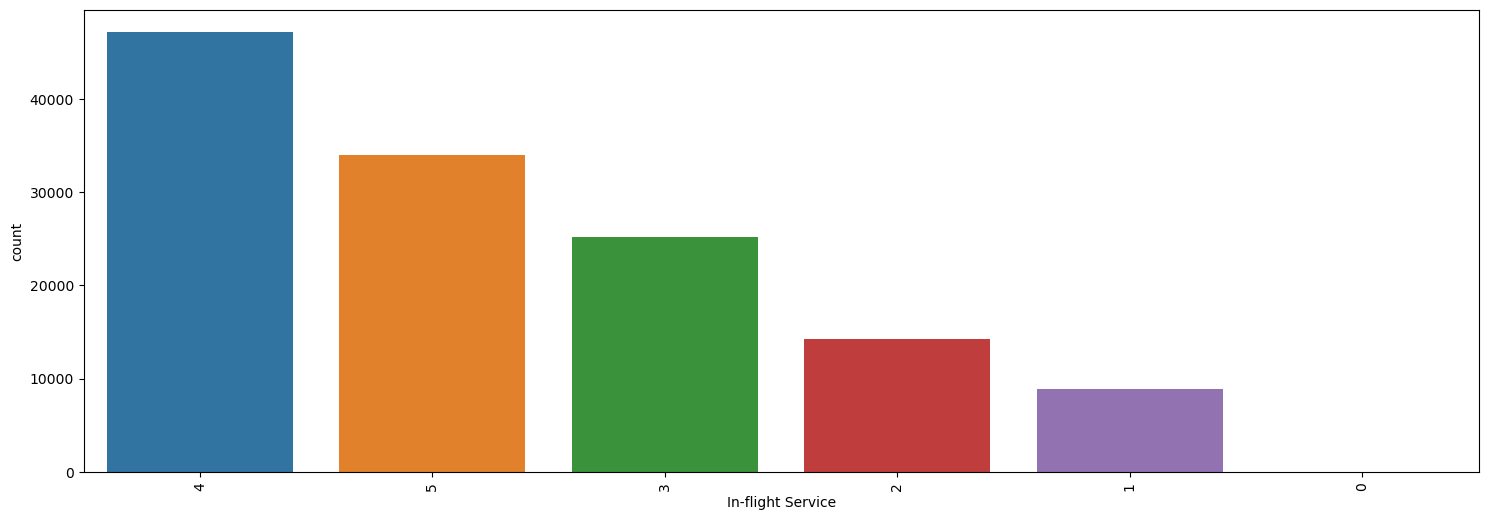

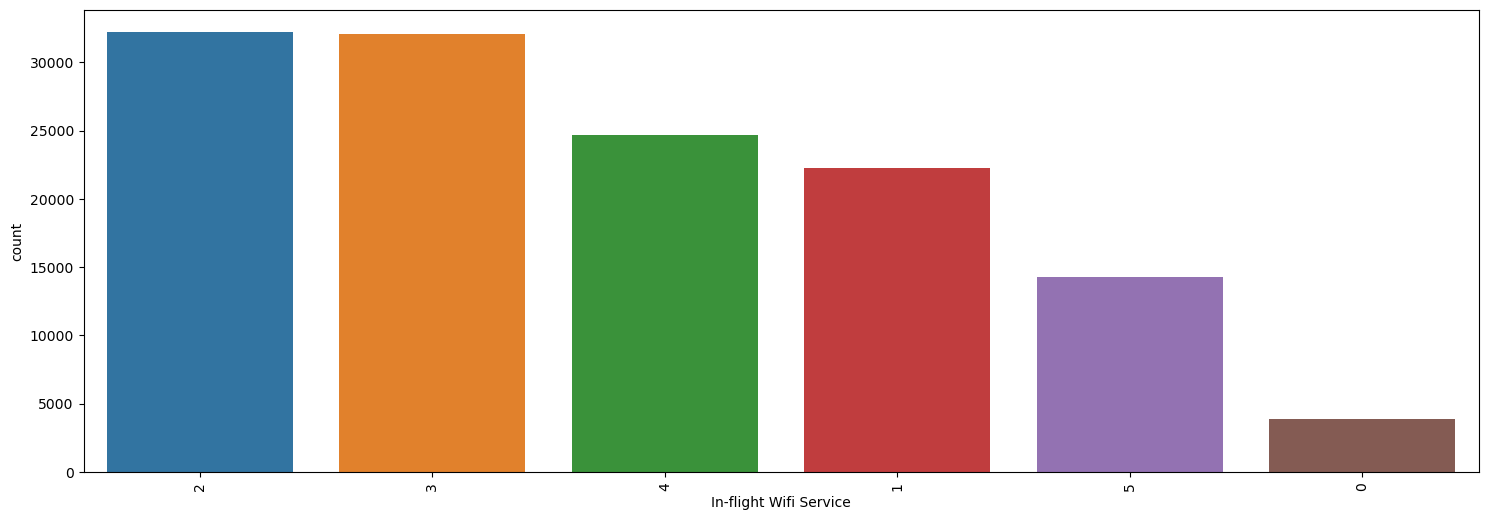

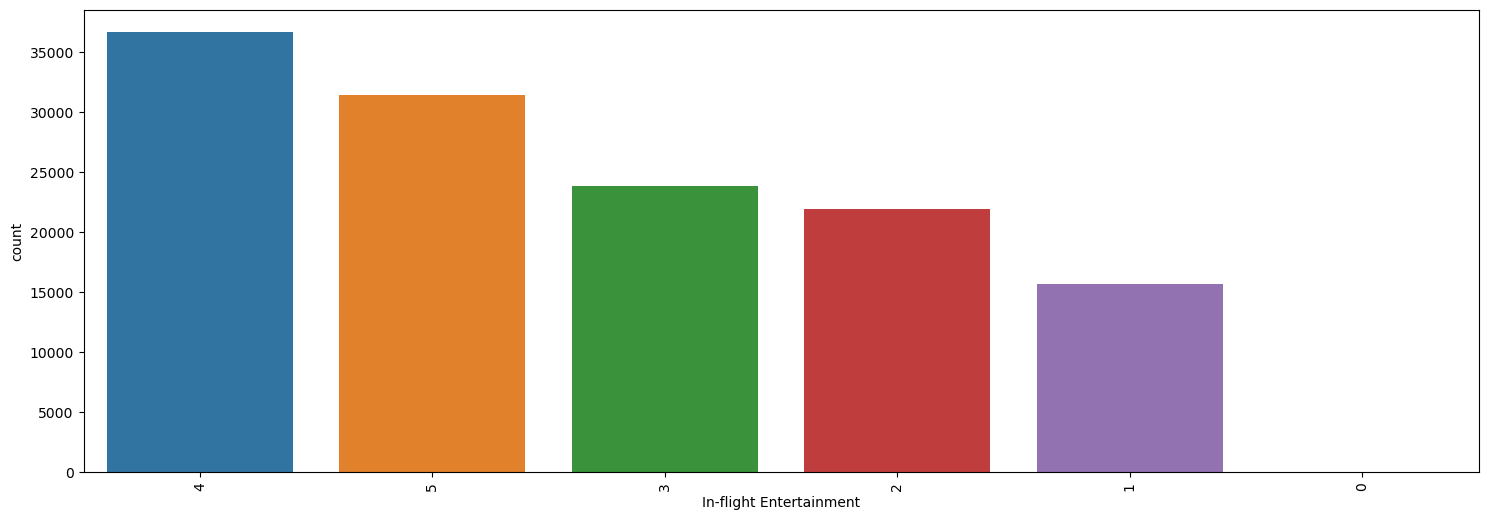

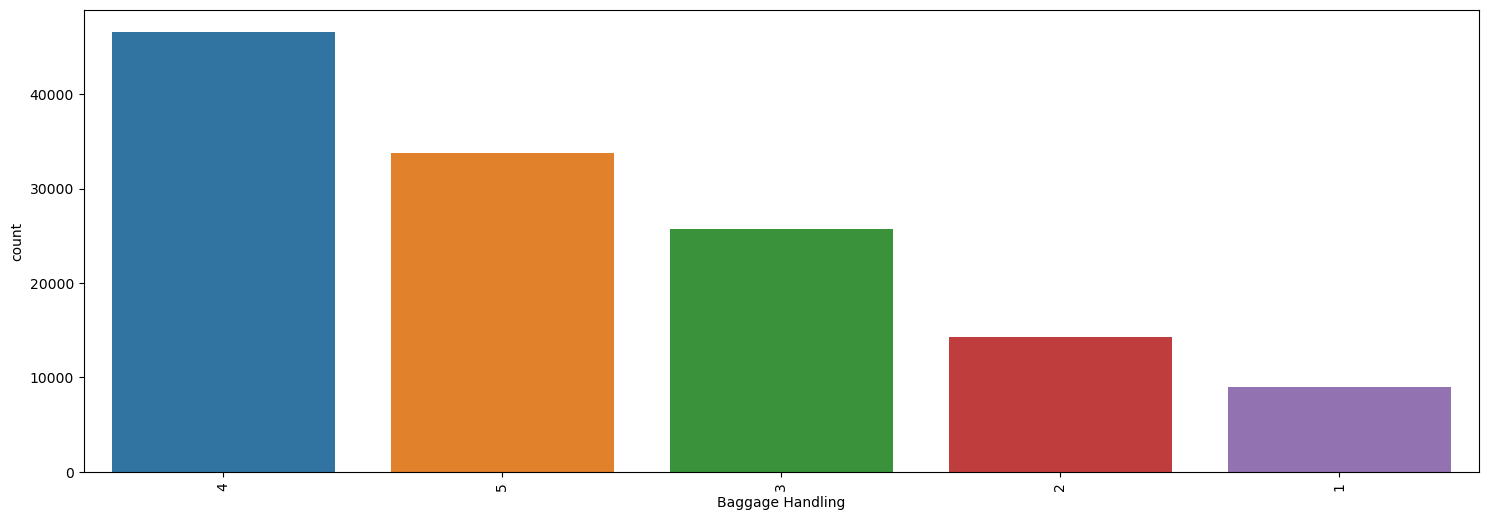

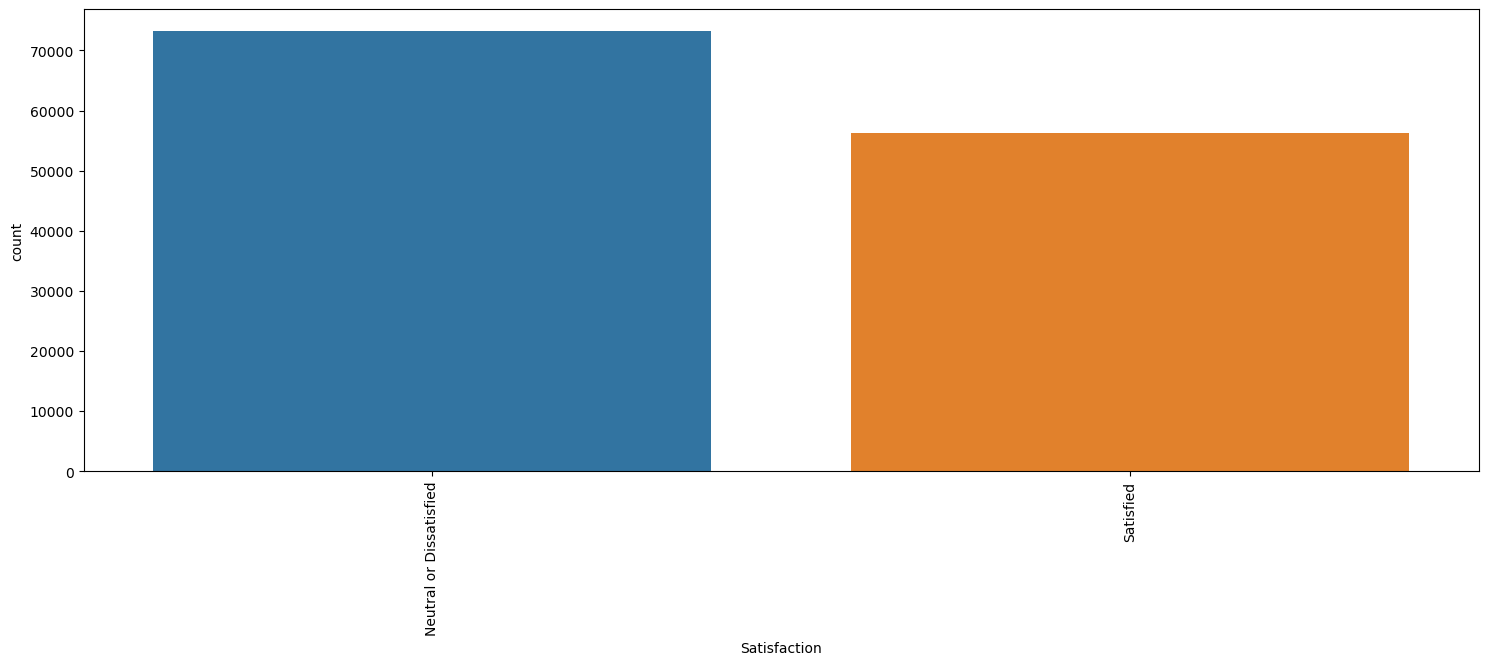

In [171]:
for i in df.columns:
    plt.figure(figsize=(18,6))
    sns.countplot(x =df[i][1:],data=df.iloc[1:],order=df[i][1:].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

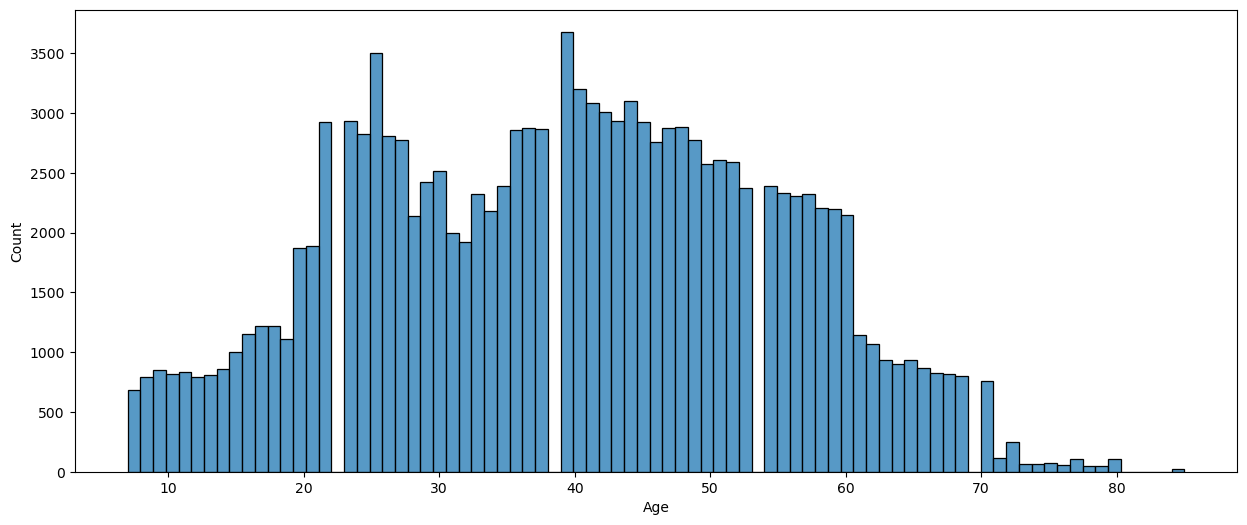

In [172]:
plt.figure(figsize=(15,6))
sns.histplot(df['Age'],palette='hls')
plt.show()

In [173]:
df1=df[['Departure and Arrival Time Convenience','Ease of Online Booking','Check-in Service', 'Online Boarding', 'Gate Location',
'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
'In-flight Entertainment', 'Baggage Handling']]

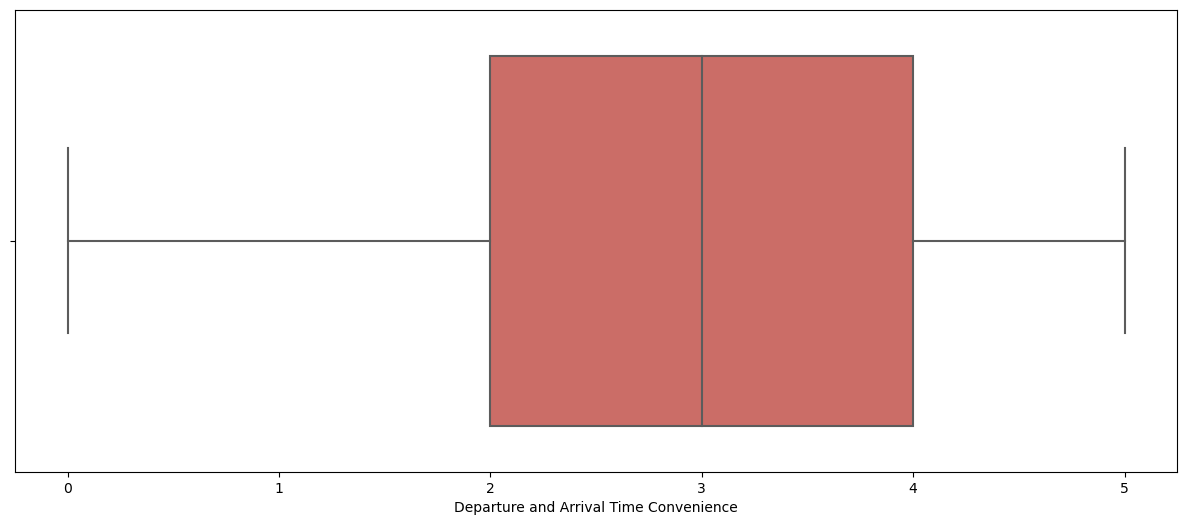

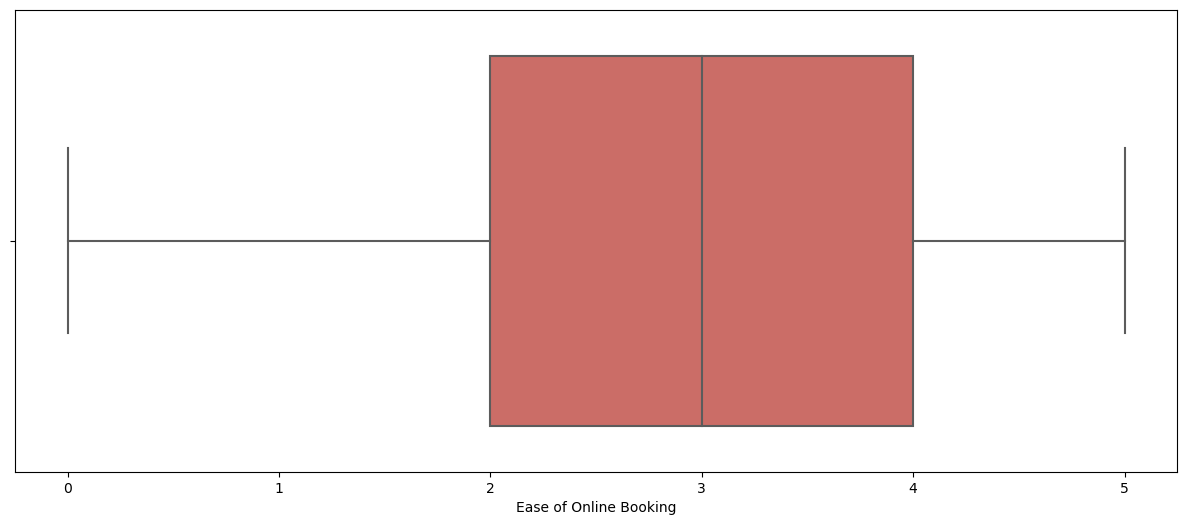

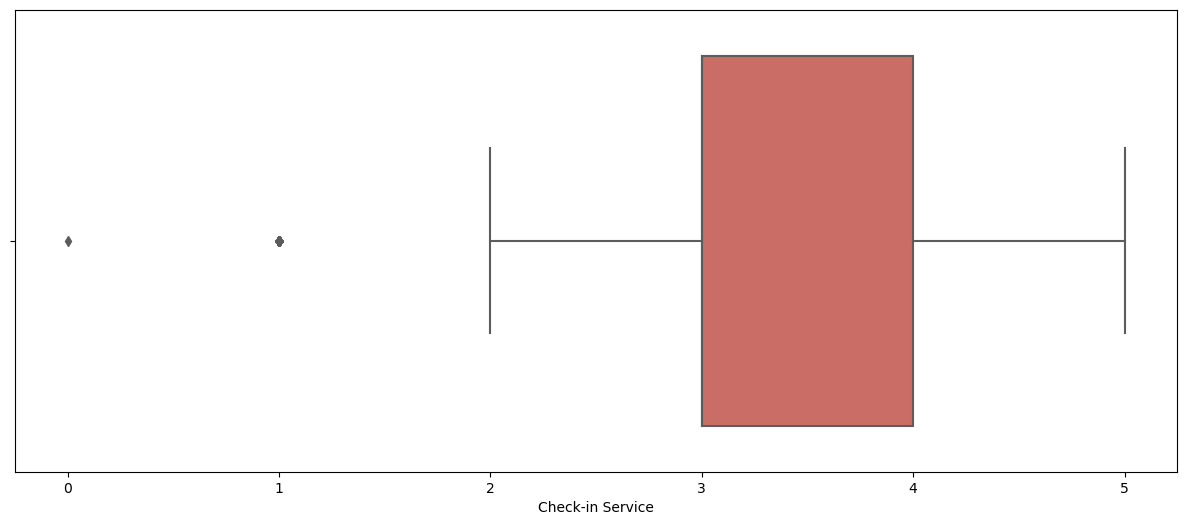

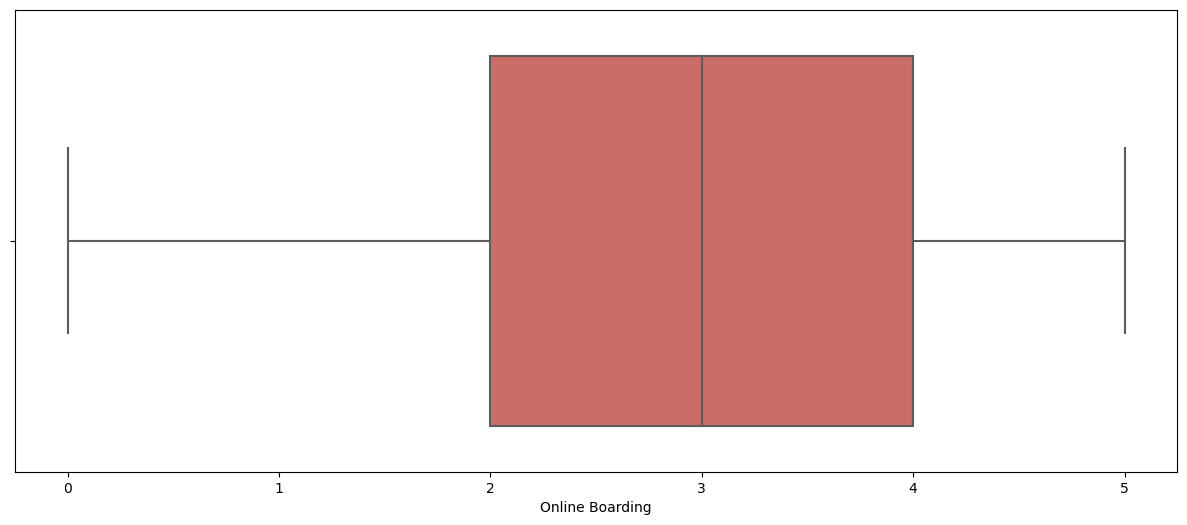

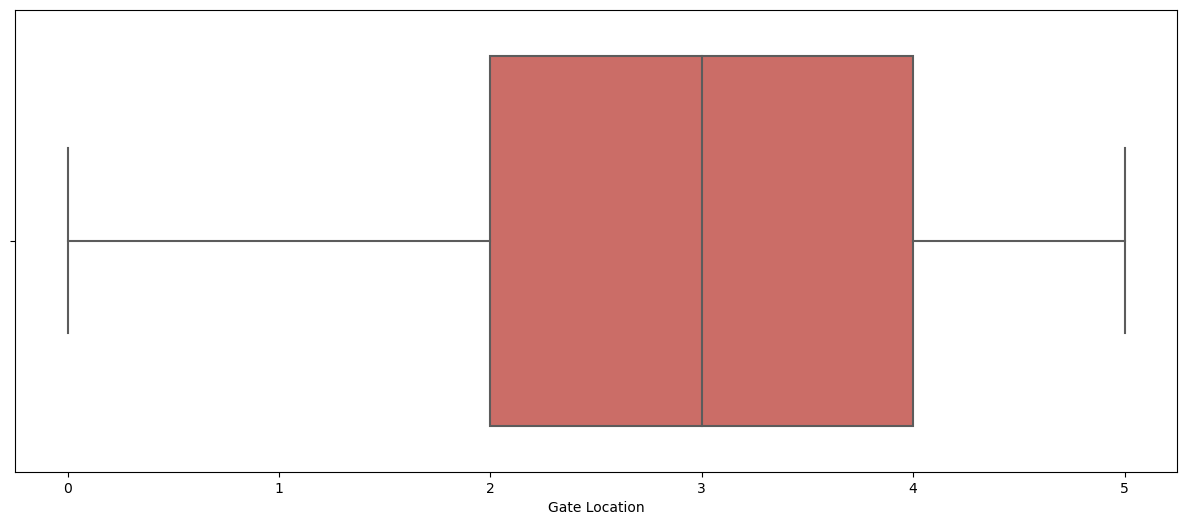

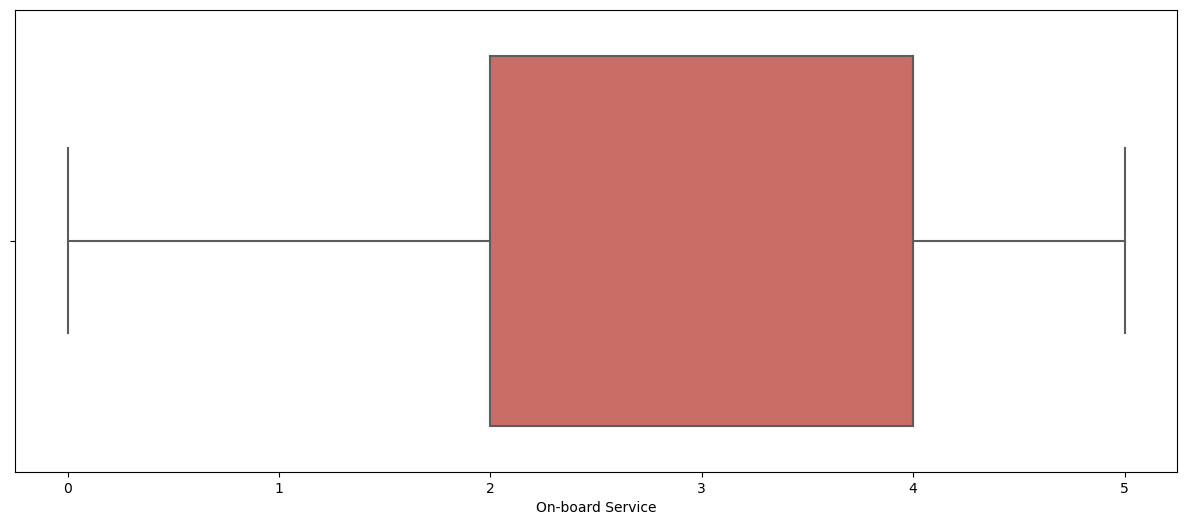

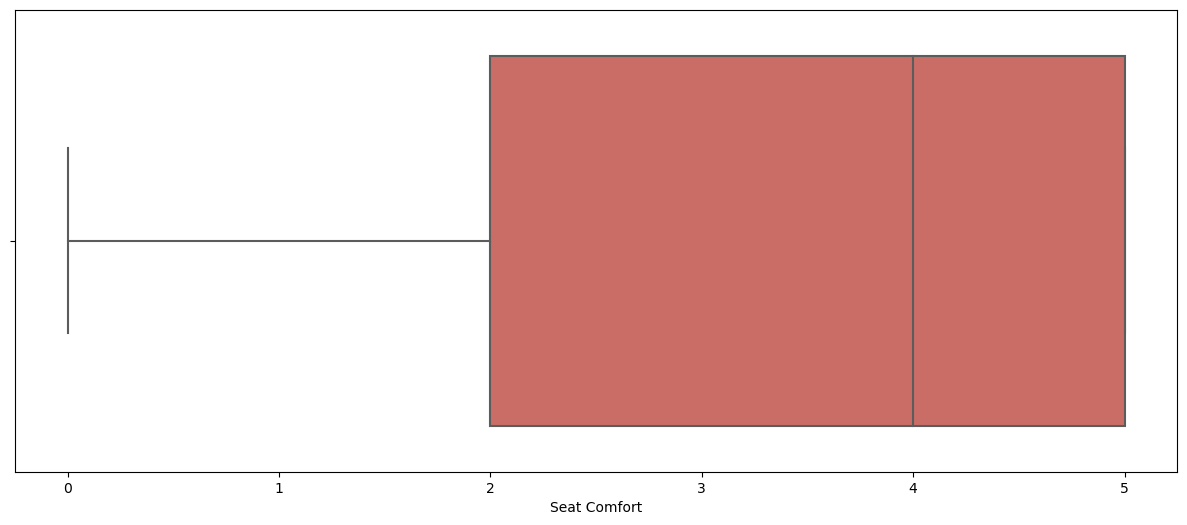

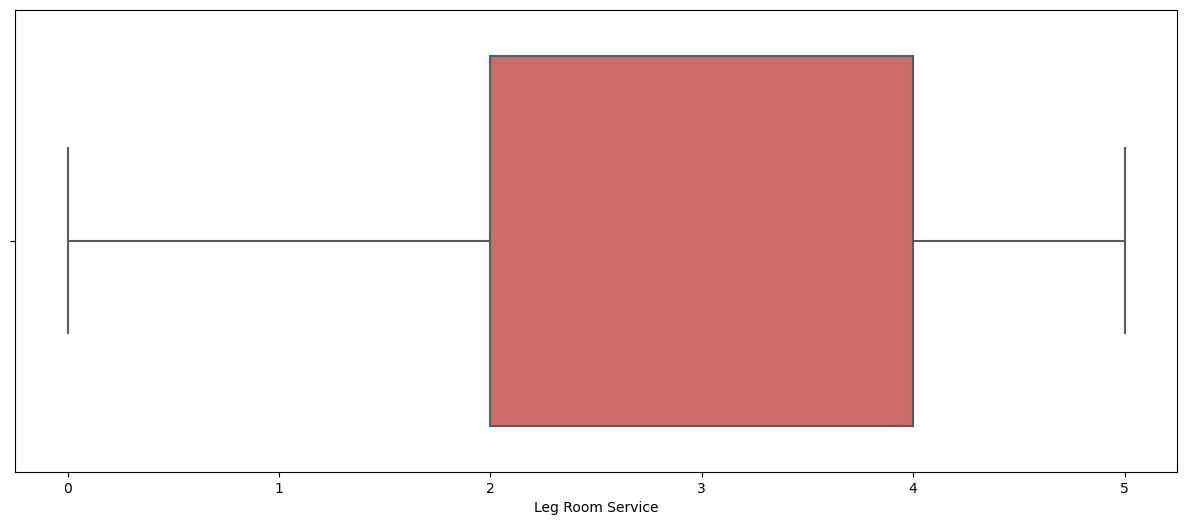

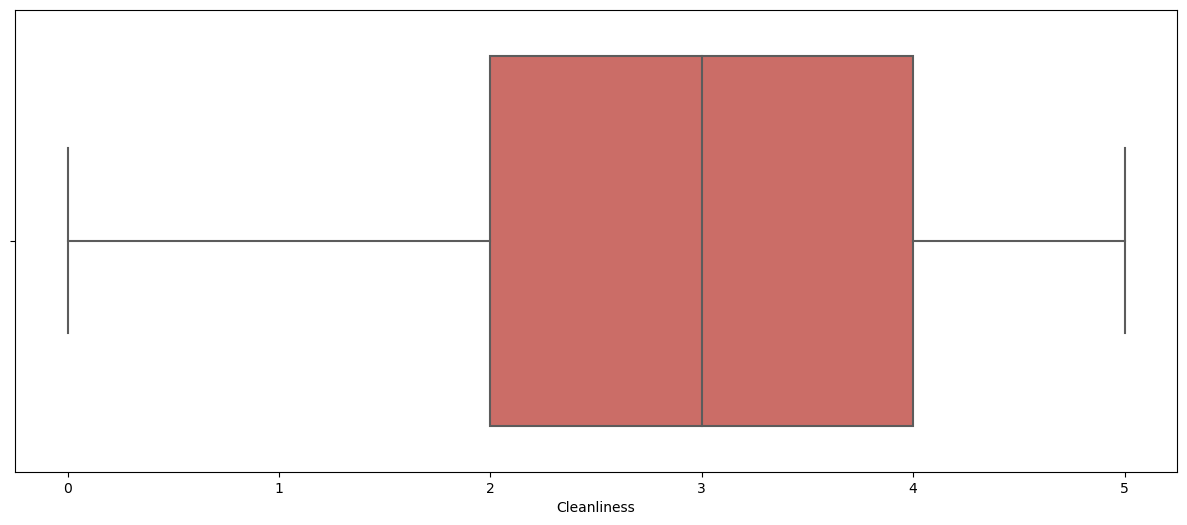

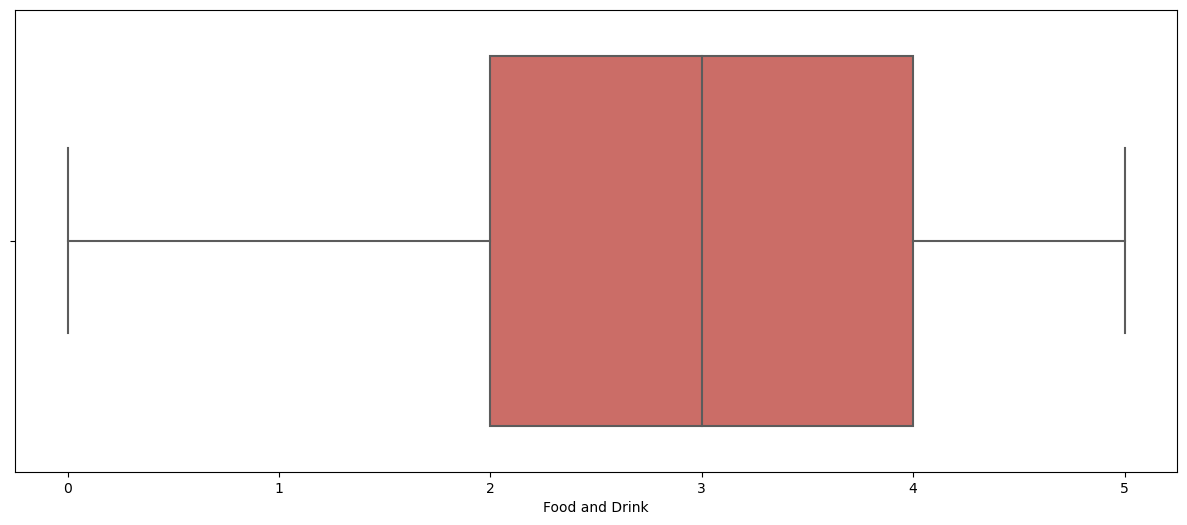

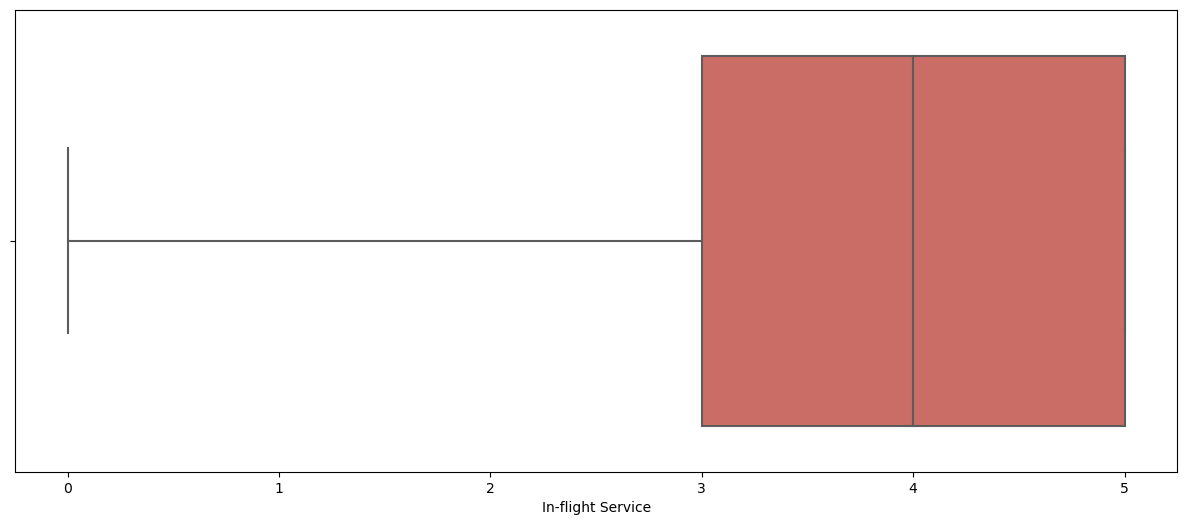

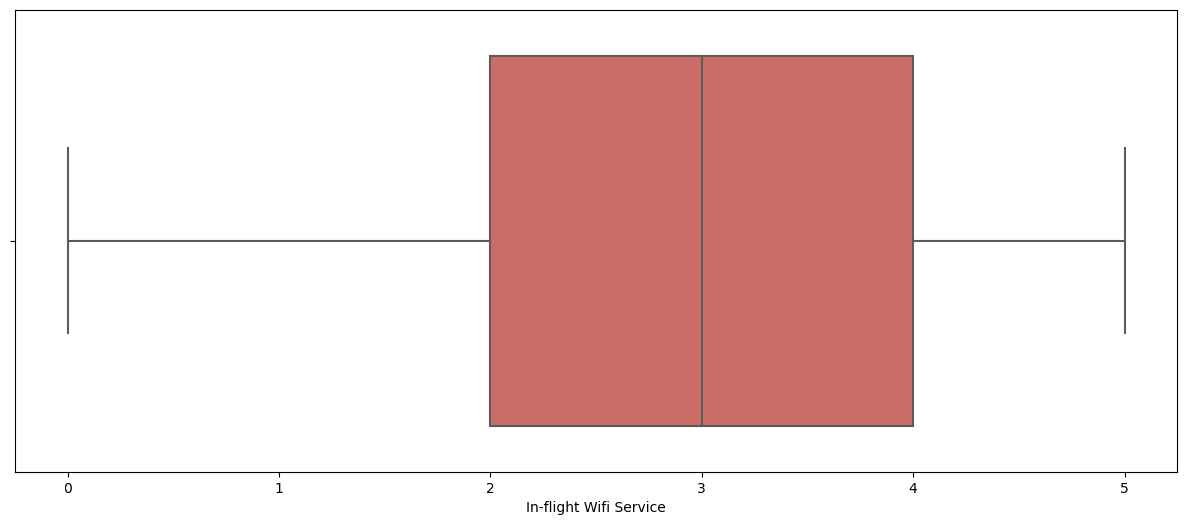

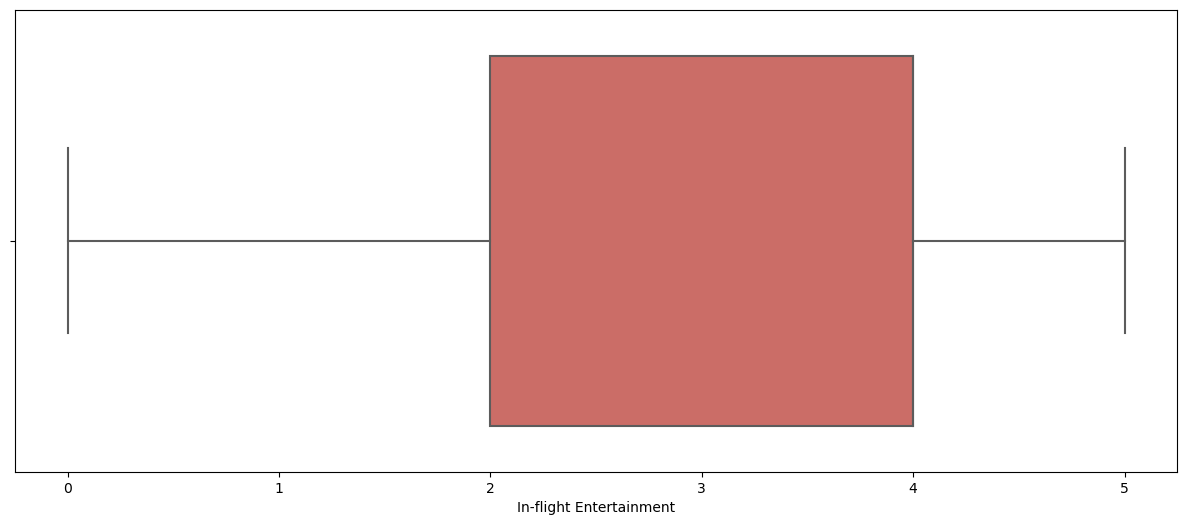

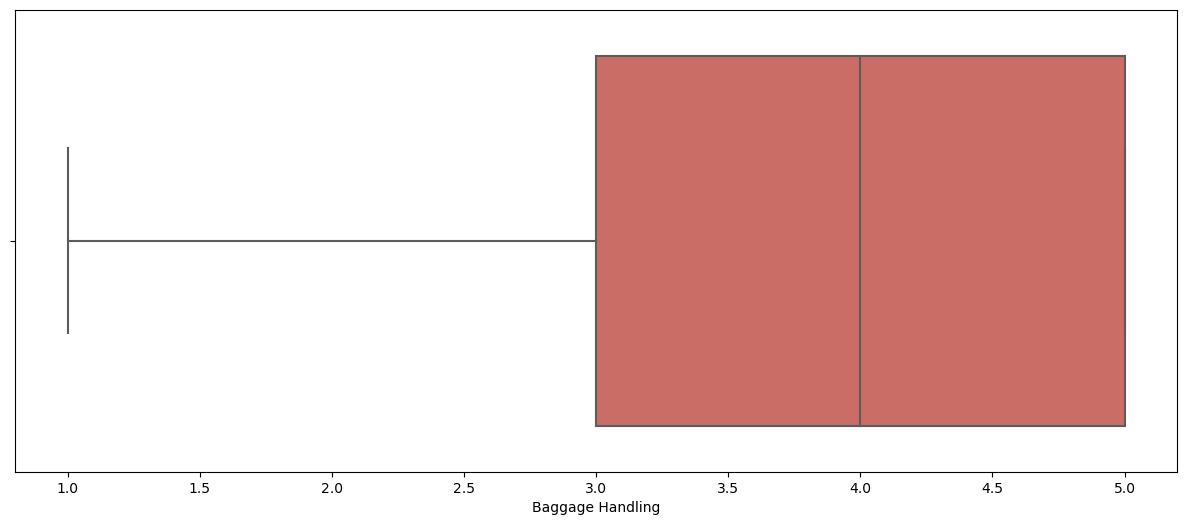

In [174]:
for j in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x =df1[j][1:],data=df1.iloc[1:],order=df1[j][1:].value_counts().index,palette='hls')
    plt.show()

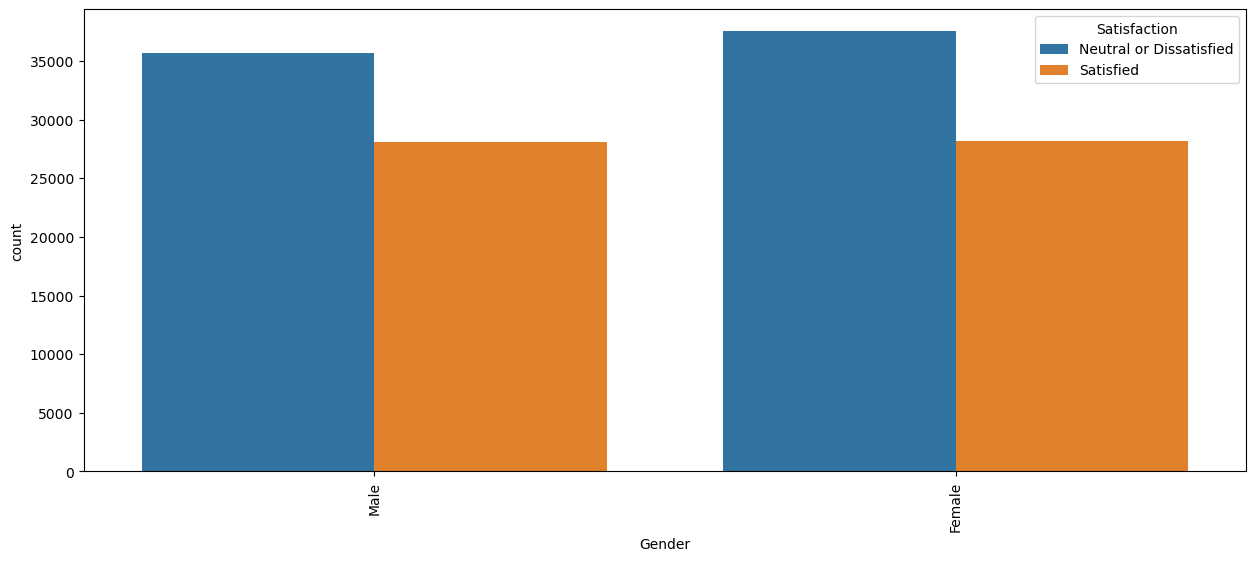

In [175]:
plt.figure(figsize=(15,6))
sns.countplot('Gender',hue='Satisfaction',data=df)
plt.xticks(rotation=90)
plt.show()

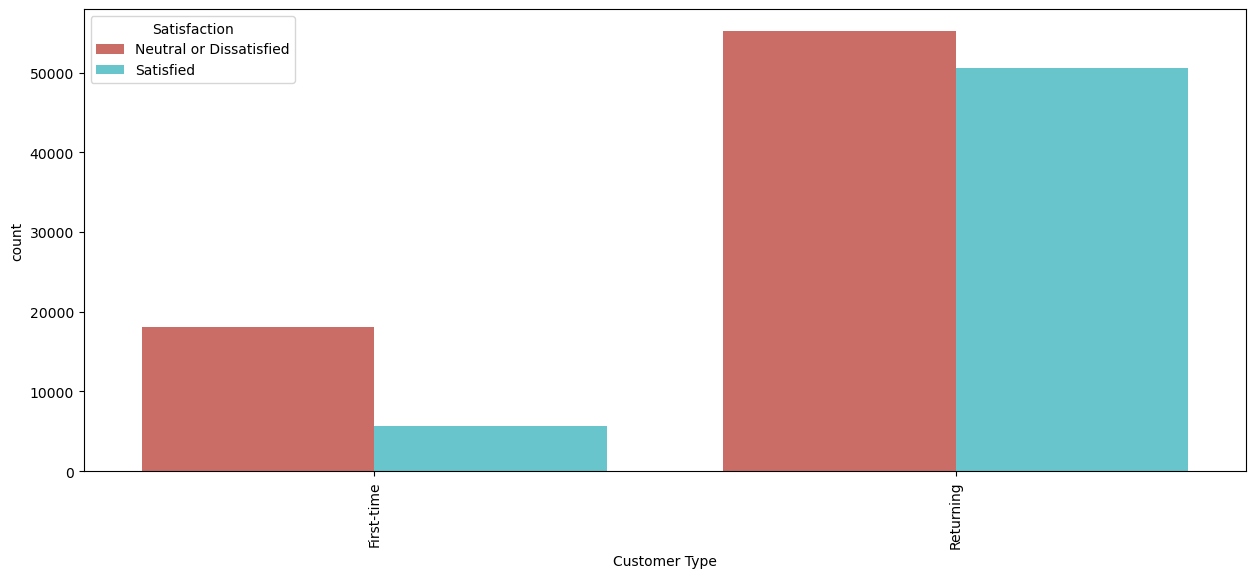

In [176]:
plt.figure(figsize=(15,6))
sns.countplot('Customer Type',hue='Satisfaction',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

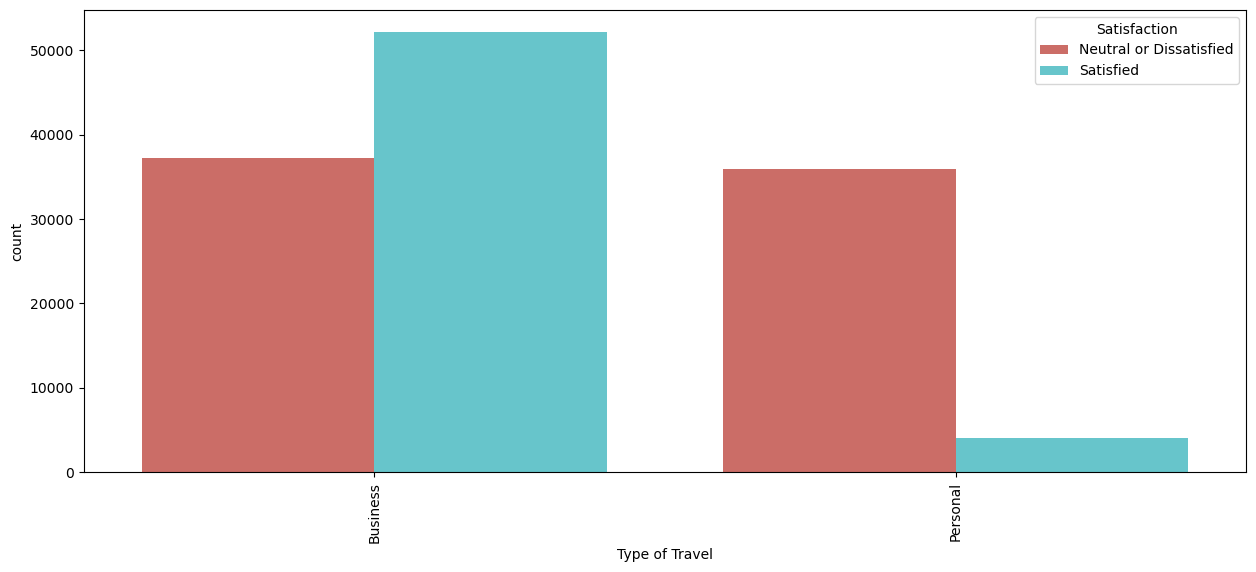

In [177]:
plt.figure(figsize=(15,6))
sns.countplot('Type of Travel',hue='Satisfaction',data =df,palette='hls')
plt.xticks(rotation=90)
plt.show()

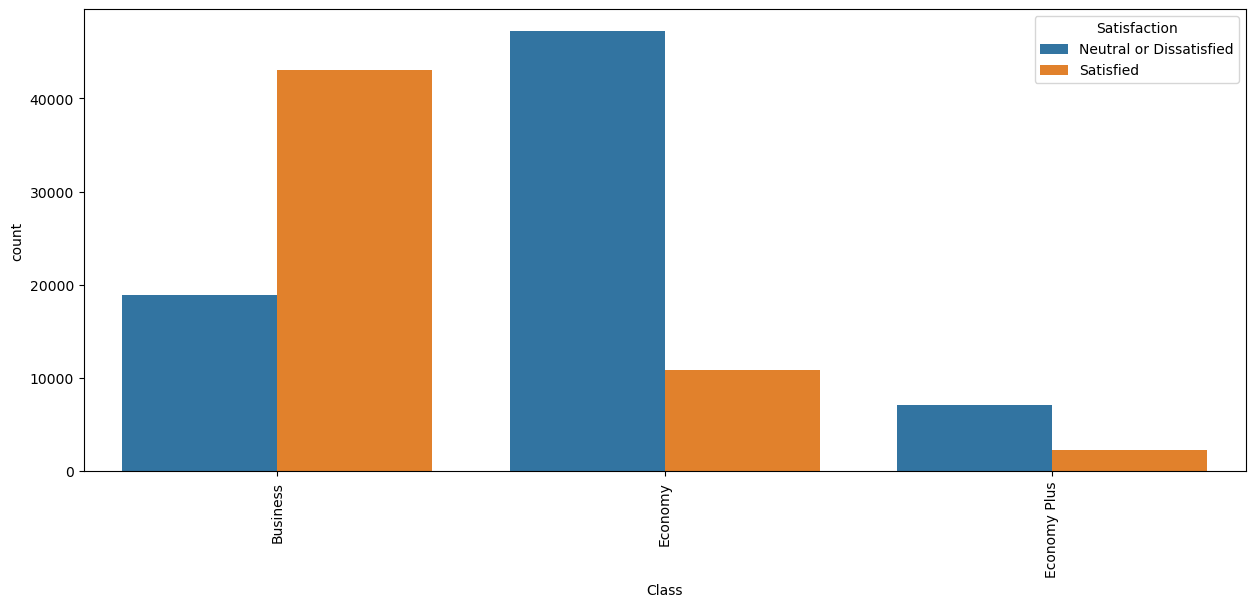

In [178]:
plt.figure(figsize=(15,6))
sns.countplot('Class', hue='Satisfaction',data =df)
plt.xticks(rotation=90)
plt.show()

In [179]:
df2=df[['Gender', 'Customer Type', 'Type of Travel','Class', 'Satisfaction']]
df2.sample(5)

,Gender,Customer Type,Type of Travel,Class,Satisfaction
48772,Female,Returning,Business,Business,Satisfied
109388,Male,Returning,Personal,Economy,Neutral or Dissatisfied
89609,Male,Returning,Business,Business,Satisfied
40090,Female,Returning,Business,Business,Satisfied
18071,Female,Returning,Personal,Economy,Satisfied


In [180]:
le=preprocessing.LabelEncoder()
df2.loc[:,:]=df2.loc[:,:].apply(le.fit_transform)
df2.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1


In [181]:
df[list(df2.columns)]=df2
df=df.apply(pd.to_numeric, errors='coerce')
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


<AxesSubplot:>

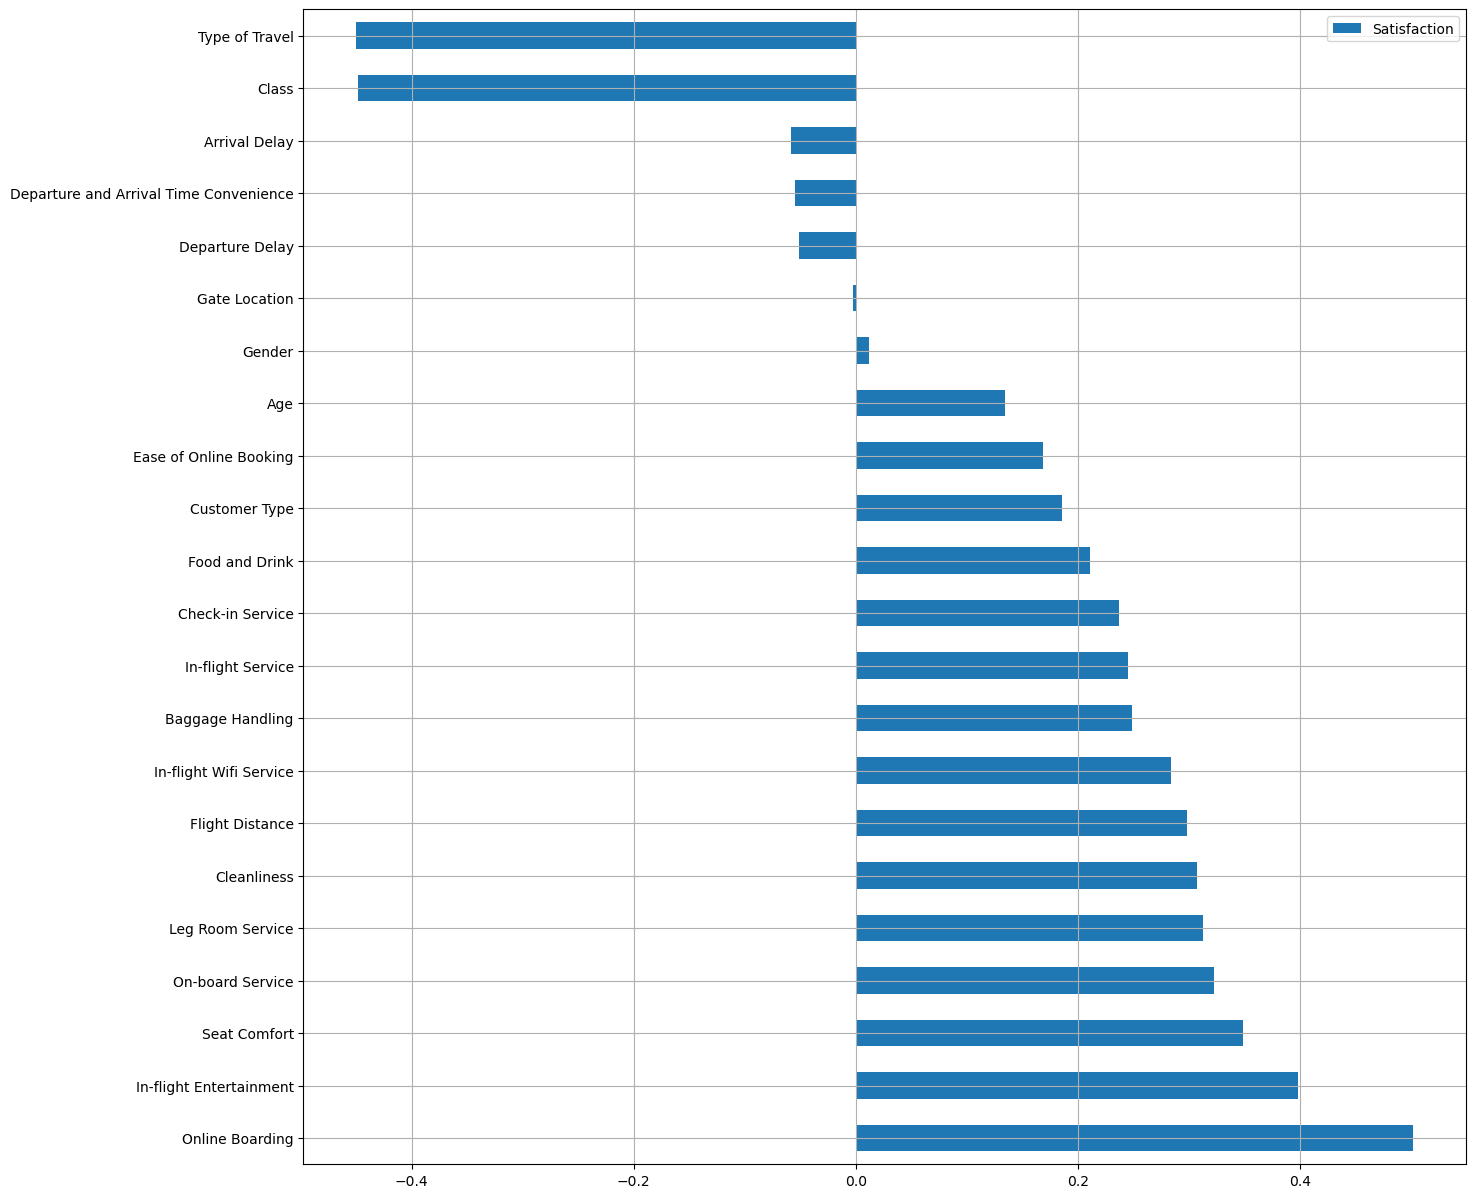

In [182]:
corr=pd.DataFrame(df.corr()['Satisfaction']).drop('Satisfaction',axis=0).sort_values(by='Satisfaction',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(15,15))

In [183]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


In [184]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(129487, 22) (103589, 22) (25898, 22)


In [186]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 1.01606704, -0.09313348,  0.47311121, ..., -1.29903661,
        -1.76847119, -2.2300559 ],
       [ 1.01606704, -0.15930316,  0.47311121, ...,  1.71237998,
         1.2291956 ,  1.15744984],
       [-0.98418702, -0.62249087,  0.47311121, ...,  0.95952583,
         0.4797789 ,  1.15744984],
       ...,
       [ 1.01606704,  1.03175096,  0.47311121, ..., -2.05189075,
        -1.01905449, -1.38317946],
       [-0.98418702, -0.68866054,  0.47311121, ...,  0.95952583,
         1.2291956 , -1.38317946],
       [-0.98418702,  0.23771488,  0.47311121, ..., -1.29903661,
        -1.76847119, -2.2300559 ]])

In [187]:
models=[KNeighborsClassifier(n_neighbors=11),GaussianNB(),SVC(),DecisionTreeClassifier(),LogisticRegression(),RandomForestClassifier()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print("{}:{}".format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=11):93.13460498880222

GaussianNB():86.19970654104564

SVC():95.57880917445362

DecisionTreeClassifier():94.52853502200942

LogisticRegression():87.22681288130357

RandomForestClassifier():96.32404046644528



              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14685
           1       0.93      0.94      0.94     11213

    accuracy                           0.95     25898
   macro avg       0.94      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



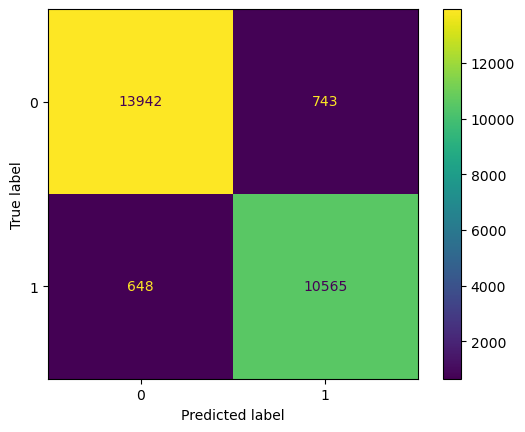

In [188]:
# DecisionTree
model1=models[3] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14685
           1       0.96      0.94      0.95     11213

    accuracy                           0.96     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.96      0.96      0.96     25898



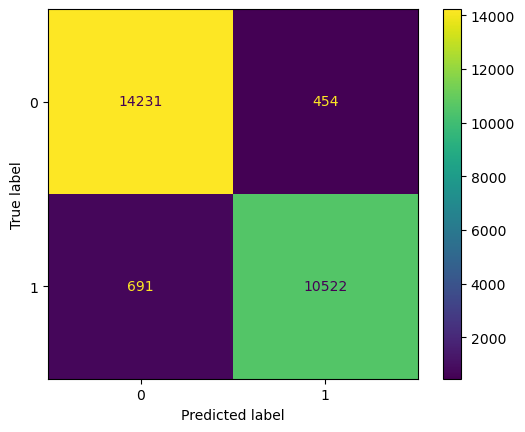

In [189]:
# SVC
model1=models[2] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14685
           1       0.97      0.94      0.96     11213

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



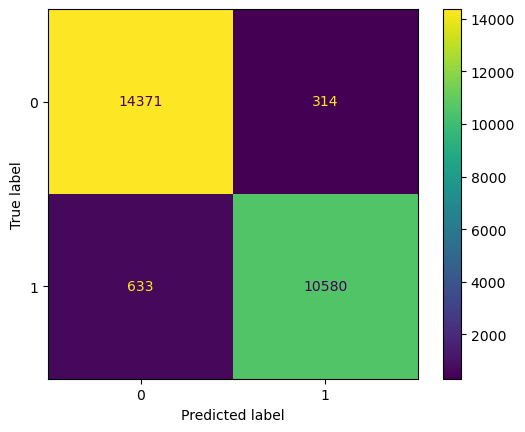

In [190]:
# Randomforest
model1=models[5] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd